# **SmartFly: Otimização de Preços de Voos com Machine Learning**
**Trabalho realizado por:**
- Nuno Gonçalves  → 2015063961 
-  Bernardo Silva → 2020112296 
-  Simão Dias → 2020132169 

# ***📌 Capítulo: "Importação de Bibliotecas, Carregamento do Dataset e Análise Inicial"***

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, countDistinct, isnan, when
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Criar sessão do Spark
spark = SparkSession.builder.appName("Projeto_Big_Data").getOrCreate()

In [ ]:
# Carregar dataset
file_path = "Clean_Dataset.csv"

In [ ]:
df = spark.read.csv(file_path, header=True, inferSchema=True)


In [ ]:
# Exibir as primeiras 5 linhas do DataFrame Spark
df.show(5, truncate=False)

+---+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+
|_c0|airline |flight |source_city|departure_time|stops|arrival_time |destination_city|class  |duration|days_left|price|
+---+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+
|0  |SpiceJet|SG-8709|Delhi      |Evening       |zero |Night        |Mumbai          |Economy|2.17    |1        |5953 |
|1  |SpiceJet|SG-8157|Delhi      |Early_Morning |zero |Morning      |Mumbai          |Economy|2.33    |1        |5953 |
|2  |AirAsia |I5-764 |Delhi      |Early_Morning |zero |Early_Morning|Mumbai          |Economy|2.17    |1        |5956 |
|3  |Vistara |UK-995 |Delhi      |Morning       |zero |Afternoon    |Mumbai          |Economy|2.25    |1        |5955 |
|4  |Vistara |UK-963 |Delhi      |Morning       |zero |Morning      |Mumbai          |Economy|2.33    |1        |5955 |
+---+--------+-------+-----------+------

### ***📌 Inicialização do Ambiente e Carregamento dos Dados***
Este bloco de código refere-se ao **início do processo de análise de dados em Spark**, onde se realiza a **importação das bibliotecas essenciais, a criação da sessão Spark, o carregamento do dataset e a verificação inicial dos dados**.

Abaixo, detalhamos cada passo:

#### **1️⃣ Importação das Bibliotecas**
- Importar SparkSession, que é essencial para criar e gerir uma sessão Spark.
- Importar funções da SparkSQL, úteis para manipulação e análise dos dados.
- Importar bibliotecas de visualização e análise, como Matplotlib e Pandas, para análises complementares.

#### **2️⃣ Criação da Sessão Spark**
- Criar uma instância da SparkSession, fundamental para carregar, processar e manipular grandes volumes de dados em distribuição paralela.
- O SparkSession é o ponto de entrada para interagir com o Apache Spark.

#### **3️⃣ Carregamento do Dataset**
- Carregar o dataset "Clean_Dataset.csv" para um DataFrame Spark.
- O parâmetro header=True assegura que a primeira linha contém os nomes das colunas.
- O parâmetro inferSchema=True permite que Spark determine automaticamente os tipos de dados.

#### **4️⃣ Exibição das Primeiras Linhas**
- Exibir as primeiras 5 linhas do dataset, permitindo uma visualização inicial dos dados.
- O parâmetro truncate=False impede que valores longos sejam cortados na saída.
---

### ***📌 Preparação e Limpeza Inicial dos Dados***

In [ ]:

# Contar número de linhas e colunas
num_rows = df.count()
num_cols = len(df.columns)

print(f"Total de linhas: {num_rows} e colunas: {num_cols}")

# Exibir primeiras 5 linhas
df.show(5)

# Exibir colunas e tipos de dados
print("\n📌 **Colunas e Tipos de Dados:**")
for col_name, data_type in df.dtypes:
    print(f"Coluna: {col_name} | Tipo de dado: {data_type}")

Total de linhas: 300153 e colunas: 12
+---+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+
|_c0| airline| flight|source_city|departure_time|stops| arrival_time|destination_city|  class|duration|days_left|price|
+---+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+
|  0|SpiceJet|SG-8709|      Delhi|       Evening| zero|        Night|          Mumbai|Economy|    2.17|        1| 5953|
|  1|SpiceJet|SG-8157|      Delhi| Early_Morning| zero|      Morning|          Mumbai|Economy|    2.33|        1| 5953|
|  2| AirAsia| I5-764|      Delhi| Early_Morning| zero|Early_Morning|          Mumbai|Economy|    2.17|        1| 5956|
|  3| Vistara| UK-995|      Delhi|       Morning| zero|    Afternoon|          Mumbai|Economy|    2.25|        1| 5955|
|  4| Vistara| UK-963|      Delhi|       Morning| zero|      Morning|          Mumbai|Economy|    2.33|        1| 5955|
+-

In [ ]:
# Função para verificar valores nulos em todas as colunas
def missing_values(df):
    return df.select([
        count(when(col(c).isNull(), c)).alias(c) for c in df.columns
    ])

# Aplicar a função no DataFrame
df_missing = missing_values(df)

# Mostrar os valores nulos por coluna
df_missing.show()


+---+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+---------+-----+
|_c0|airline|flight|source_city|departure_time|stops|arrival_time|destination_city|class|duration|days_left|price|
+---+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+---------+-----+
|  0|      0|     0|          0|             0|    0|           0|               0|    0|       0|        0|    0|
+---+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+---------+-----+



In [ ]:
# 4. Verificar valores duplicados
num_total = df.count()
num_unique = df.dropDuplicates().count()
num_duplicates = num_total - num_unique

print(f"Total de linhas duplicadas: {num_duplicates}")


Total de linhas duplicadas: 0


In [ ]:
# 5. Contagem de valores únicos por coluna
df_unique_values = df.select([countDistinct(col(c)).alias(c) for c in df.columns])

# Mostrar os resultados
df_unique_values.show()

+------+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+---------+-----+
|   _c0|airline|flight|source_city|departure_time|stops|arrival_time|destination_city|class|duration|days_left|price|
+------+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+---------+-----+
|300153|      6|  1561|          6|             6|    3|           6|               6|    2|     476|       49|12157|
+------+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+---------+-----+



In [ ]:
# Remover a coluna _c0 por não ser relevante para a análise
df = df.drop("_c0")

# Exibir o esquema do DataFrame sem a coluna _c0
df.printSchema()

# Contar número de linhas e colunas após a remoção
num_rows = df.count()  # Pode ser lento em datasets grandes
num_cols = len(df.columns)

print(f"Total de linhas: {num_rows} e colunas: {num_cols}")

# Exibir algumas amostras para validar os dados
df.show(5)

root
 |-- airline: string (nullable = true)
 |-- flight: string (nullable = true)
 |-- source_city: string (nullable = true)
 |-- departure_time: string (nullable = true)
 |-- stops: string (nullable = true)
 |-- arrival_time: string (nullable = true)
 |-- destination_city: string (nullable = true)
 |-- class: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- days_left: integer (nullable = true)
 |-- price: integer (nullable = true)

Total de linhas: 300153 e colunas: 11
+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+
| airline| flight|source_city|departure_time|stops| arrival_time|destination_city|  class|duration|days_left|price|
+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+
|SpiceJet|SG-8709|      Delhi|       Evening| zero|        Night|          Mumbai|Economy|    2.17|        1| 5953|
|SpiceJet|SG-8157|      Delhi| Early_Mor

### ***📌 Análise dos Passos Realizados e Conclusão***

Nesta fase do projeto, realizámos um processamento inicial dos dados para garantir a qualidade e integridade do dataset antes da Análise Exploratória de Dados (EDA). Os principais passos realizados foram:

#### **1️⃣ Contagem de Registos e Estrutura do Dataset**
- Determinámos o número total de registos (linhas) e colunas do dataset, o que permitiu ter uma visão inicial da sua dimensão.
- Exibimos uma amostra de 5 linhas para compreender o formato e a organização das informações.
- **Resultado**: O dataset contém 300.153 registos e 12 colunas.

#### **2️⃣ Verificação de Valores em Branco e Duplicados**
- Criámos uma função para identificar valores nulos em todas as colunas.
- Verificámos a existência de valores duplicados no dataset.
- **Resultado**: Não foram encontrados valores nulos nem duplicados, indicando que os dados estão limpos.

#### **3️⃣ Contagem de Valores Únicos por Coluna**
- Avaliámos a quantidade de valores únicos em cada coluna para entender a variação dos dados.
- **Resultado**: Algumas colunas têm um elevado número de valores distintos (como o preço e o número do voo), enquanto outras possuem um conjunto mais limitado de categorias.

#### **4️⃣  Remoção de Colunas Irrelevantess**
- Excluímos a coluna "_c0", que não adiciona valor à análise.
- **Resultado**: O dataset foi reduzido para 11 colunas, mantendo apenas as informações relevantes.

Todos os passos anteriores garantiram que os **dados estão limpos, sem valores em falta ou duplicados, e com as colunas necessárias para a análise**. Com essa base sólida, podemos avançar para a **Análise Exploratória de Dados (EDA)**, onde iremos investigar padrões, relações e distribuições para obter insights mais profundos.

---


# ***📌 Capítulo: "EDA"***

## ***📌 Análise da Distribuição de Duração dos voos por Companhia aérea***

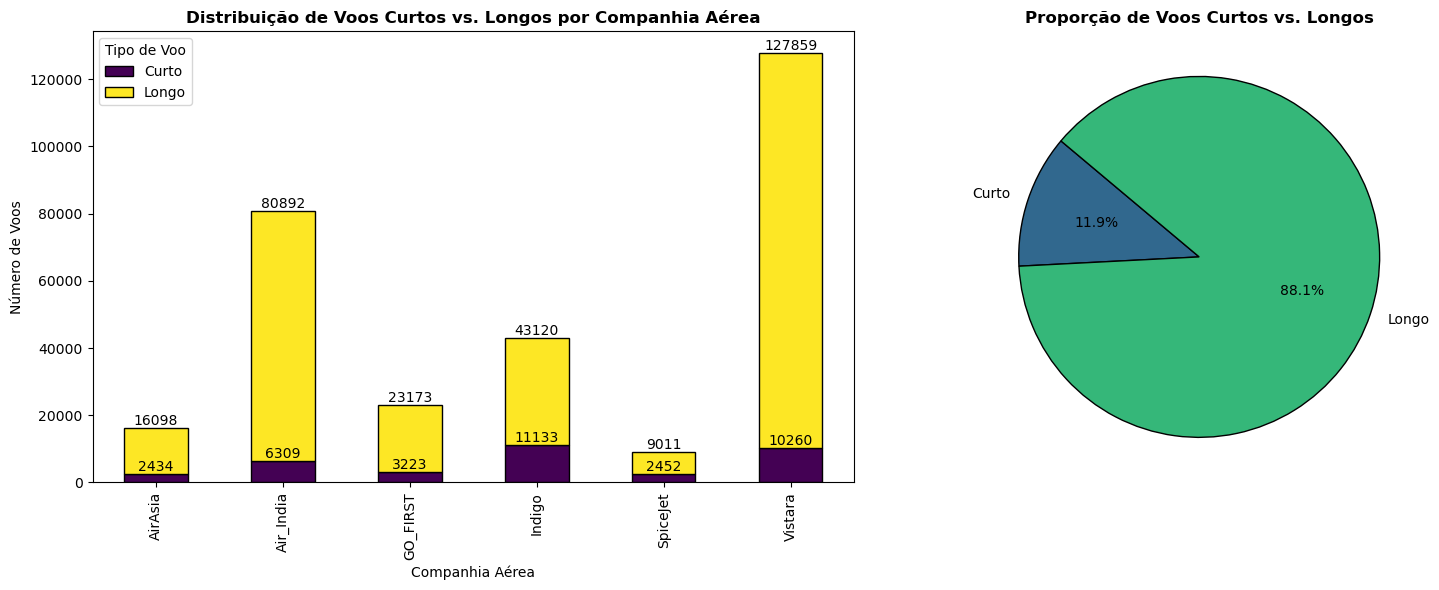

In [ ]:
from pyspark.sql.functions import col, count, when
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Definir limiar para voos curtos e longos em horas (3 horas como referência)
duration_threshold = 3.0

# Criar coluna categórica para diferenciar voos curtos e longos
df = df.withColumn("flight_type", when(col("duration") <= duration_threshold, "Curto").otherwise("Longo"))

# Contar quantos voos de cada tipo cada companhia opera
airline_flight_stats = df.groupBy("airline", "flight_type").agg(count("flight_type").alias("total_voos")).toPandas()

# Criar um pivot para facilitar a visualização
airline_flight_pivot = airline_flight_stats.pivot(index="airline", columns="flight_type", values="total_voos").fillna(0)

# Criar visualizações
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Definir paleta de cores para os gráficos
colors = sns.color_palette("viridis", len(airline_flight_pivot.columns))

# Gráfico de barras empilhadas para voos curtos vs. longos
airline_flight_pivot.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[0], edgecolor='black')
axes[0].set_title("Distribuição de Voos Curtos vs. Longos por Companhia Aérea", fontweight="bold")
axes[0].set_xlabel("Companhia Aérea")
axes[0].set_ylabel("Número de Voos")
axes[0].legend(title="Tipo de Voo")

# Adicionar rótulos aos valores das barras
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Criar gráfico de pizza com melhor separação e labels
total_flight_distribution = df.groupBy("flight_type").agg(count("flight_type").alias("total")).toPandas()
axes[1].pie(total_flight_distribution["total"], labels=total_flight_distribution["flight_type"], autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
axes[1].set_title("Proporção de Voos Curtos vs. Longos", fontweight="bold")

plt.tight_layout()
plt.show()


### 📌 Conclusões
A análise dos preços dos bilhetes de avião revela **disparidades significativas** entre as diferentes companhias aéreas, refletindo possivelmente **diferenças na qualidade do serviço, tipo de voos (econômico vs. premium), e estratégias de precificação**. Com base nos gráficos gerados, podemos destacar os seguintes pontos:

### **1️⃣ Distribuição de Voos Curtos vs. Longos por Companhia Aérea (Gráfico de Barras)**
- A grande maioria dos voos operados pelas companhias aéreas são voos longos, com algumas exceções.
- A Vistara é a companhia que mais opera voos longos, seguida da Air India.
- No entanto, algumas companhias como Indigo e GO_FIRST apresentam uma proporção relativamente maior de voos curtos, embora ainda dominados pelos voos longos.
- AirAsia e SpiceJet operam menos voos em comparação com outras companhias, mas ainda assim mantêm um número razoável de voos curtos..

### **2️⃣ Proporção de Voos Curtos vs. Longos (Gráfico de Pizza)**
- O mercado de aviação analisado é claramente dominado por voos longos, que representam 88,1% do total.
- Apenas 11,9% dos voos são curtos, o que pode indicar que o mercado analisado cobre predominantemente distâncias maiores.
- Esta distribuição pode afetar estratégias de preço, alocação de aeronaves e competitividade entre companhias que operam rotas mais curtas.

- --


## ***📌 Análise da Distribuição de Preços das Companhias Aéreas***

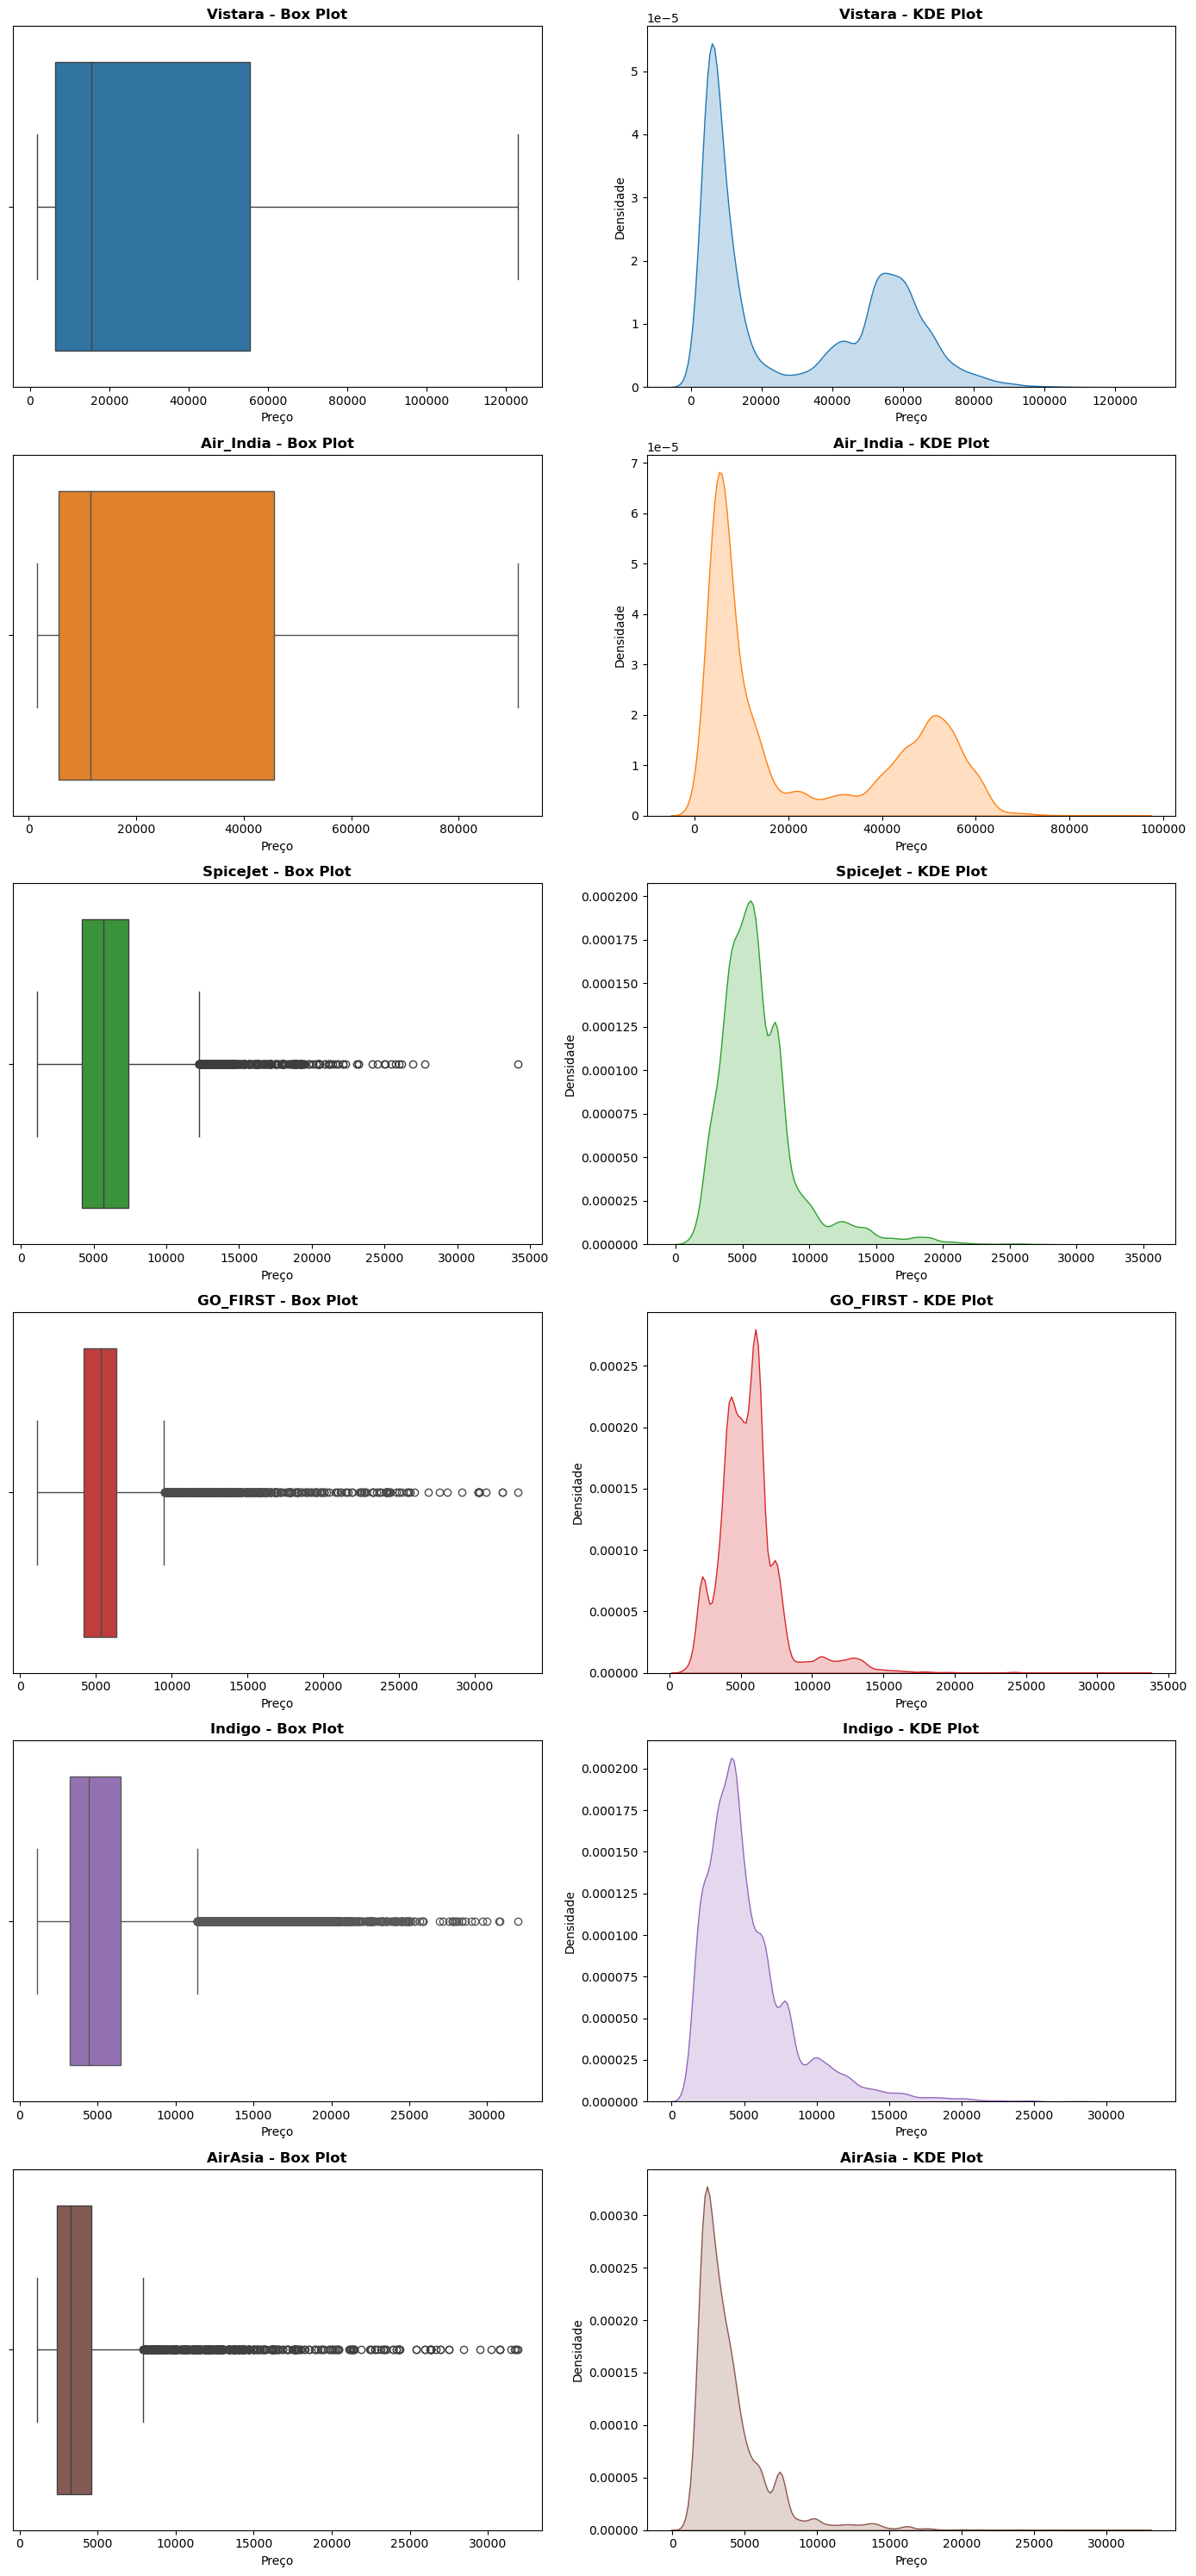

C:\Users\35191\AppData\Local\Temp\ipykernel_30484\4064605536.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Média", y="airline", data=airline_price_stats, palette=palette, ax=ax)


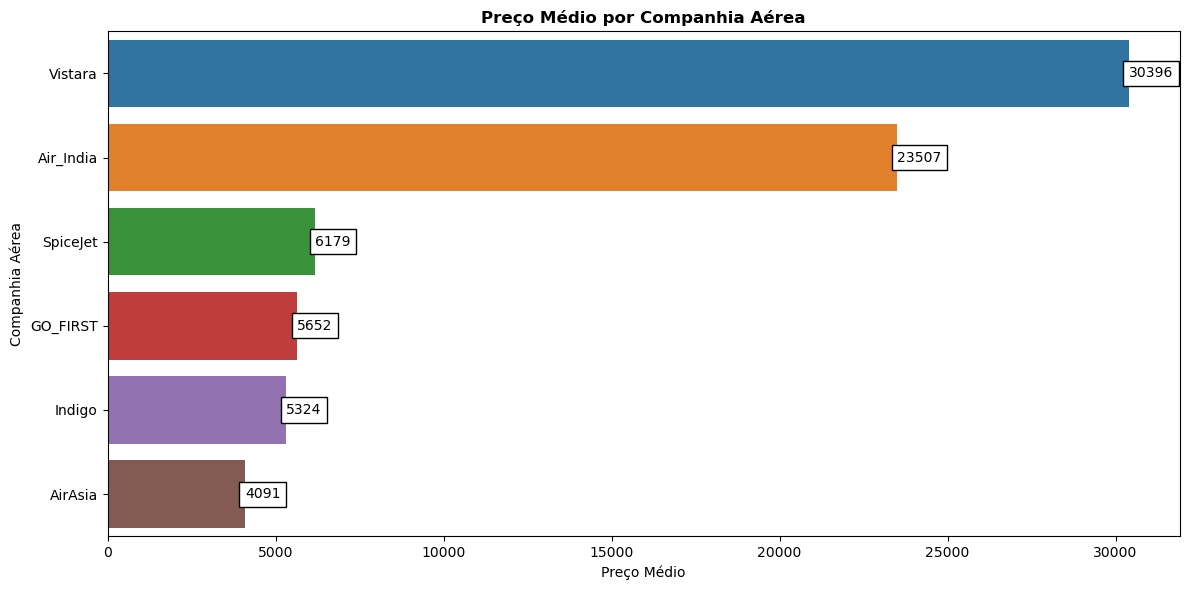

In [ ]:
from pyspark.sql.functions import col, avg, stddev, min, max, count
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Converter DataFrame Spark para Pandas para análise gráfica
pdf = df.toPandas()

# Criar um DataFrame agrupado por companhia aérea para análise de preços
airline_price_stats = df.groupBy("airline").agg(
    avg("price").alias("Média"),
    stddev("price").alias("Desvio Padrão"),
    min("price").alias("Mínimo"),
    max("price").alias("Máximo"),
    count("price").alias("Total de Registros")
).toPandas()

# Ordenar pelo preço médio
airline_price_stats = airline_price_stats.sort_values("Média", ascending=False)

# Criar visualizações com cores diferenciadas por companhia aérea
fig, axes = plt.subplots(len(airline_price_stats), 2, figsize=(14, 5 * len(airline_price_stats)))

# Paleta de cores
palette = sns.color_palette("tab10", len(airline_price_stats))

# Criar gráficos individuais para cada companhia aérea
for idx, airline in enumerate(airline_price_stats["airline"]):
    airline_data = pdf[pdf["airline"] == airline]

    # Boxplot
    sns.boxplot(x="price", data=airline_data, ax=axes[idx, 0], color=palette[idx])
    axes[idx, 0].set_title(f"{airline} - Box Plot", fontweight="bold")
    axes[idx, 0].set_xlabel("Preço")

    # KDE Plot
    sns.kdeplot(airline_data["price"], fill=True, color=palette[idx], ax=axes[idx, 1])
    axes[idx, 1].set_title(f"{airline} - KDE Plot", fontweight="bold")
    axes[idx, 1].set_xlabel("Preço")
    axes[idx, 1].set_ylabel("Densidade")

plt.tight_layout()
plt.show()

# Criar gráfico de barras para preço médio por companhia aérea
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="Média", y="airline", data=airline_price_stats, palette=palette, ax=ax)
ax.set_title("Preço Médio por Companhia Aérea", fontweight="bold")
ax.set_xlabel("Preço Médio")
ax.set_ylabel("Companhia Aérea")

# Adicionar labels aos valores
for index, value in enumerate(airline_price_stats["Média"]):
    ax.text(value, index, f"{int(value)}", va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()


### 📌 Conclusões
A análise dos preços dos bilhetes de avião revela diferenças significativas entre as diferentes companhias aéreas, refletindo possivelmente variações na qualidade do serviço, tipo de voos (económico vs. premium) e estratégias de precificação. Com base nos gráficos gerados, podemos destacar os seguintes pontos:


### **1️⃣ Companhias Aéreas com Bilhetes Mais Caros**
- A Vistara apresenta os bilhetes mais caros entre todas as companhias analisadas, com um preço médio superior a 30.000.
- A Air India surge como a segunda companhia aérea mais cara, com preços médios próximos dos 23.500.
- Ambas as companhias operam em rotas de longa distância e oferecem serviços premium, o que justifica os preços mais elevados.
- A predominância de voos longos também pode influenciar esta disparidade, já que as companhias com tarifas mais elevadas operam maioritariamente neste segmento.

### **2️⃣ Companhias Aéreas Mais Económicas**
- A AirAsia destaca-se como a companhia aérea mais acessível, com preços médios abaixo dos 5.000.
- Outras opções de baixo custo incluem Indigo e GO_FIRST, cujos bilhetes se situam entre 5.000 e 6.000.
- Estas companhias operam maioritariamente voos curtos, adotando um modelo low-cost focado em maximizar a ocupação dos voos e manter tarifas acessíveis.
- A distribuição dos voos confirma esta tendência, com companhias low-cost a apresentarem maior proporção de voos curtos em comparação com as premium.

### **3️⃣ Variabilidade dos Preços Dentro das Companhias**
- Os boxplots demonstram que companhias premium, como Vistara e Air India, apresentam uma elevada variação de preços. Isto sugere a oferta de diferentes classes tarifárias, desde opções económicas até tarifas de luxo.
- Em contraste, companhias low-cost como AirAsia, Indigo e GO_FIRST apresentam uma distribuição de preços mais concentrada, evidenciando tarifas mais uniformes e sem grandes oscilações.

### **4️⃣ Distribuição dos Preços (KDE Plots)**
- As distribuições de preços reforçam que as companhias low-cost concentram a maioria das suas tarifas entre os 2.000 e 10.000, sem grandes flutuações.
- Companhias premium apresentam distribuições multimodais, sugerindo diferentes segmentos de preços, consoante a classe da tarifa e a duração do voo.

### **5️⃣ Impacto da Duração do Voo nos Preços**
- A análise da distribuição da duração dos voos confirma que a maioria dos voos são longos (88,1%), dominando o mercado.
- As companhias Vistara e Air India operam essencialmente voos longos, o que pode justificar os preços elevados.
- Já Indigo, GO_FIRST e AirAsia operam mais voos curtos, permitindo-lhes manter tarifas mais baixas.
- Existe uma tendência clara de aumento do preço consoante a duração do voo, com voos mais longos a apresentarem valores substancialmente superiores.

### **📊 Considerações finais**:
- Se o objetivo for viajar com um orçamento reduzido, AirAsia, Indigo e GO_FIRST são as melhores opções, sobretudo para voos curtos.
- Existe uma relação direta entre a duração do voo e o preço, sendo que as companhias premium operam maioritariamente em rotas de longa distância, justificando as tarifas elevadas.
- As companhias low-cost, por outro lado, focam-se na eficiência operacional e na redução de custos, permitindo-lhes oferecer bilhetes a preços mais acessíveis

---

## ***📌 Análise da Variação do Preço Médio ao Longo dos Dias Restantes até à Partida***

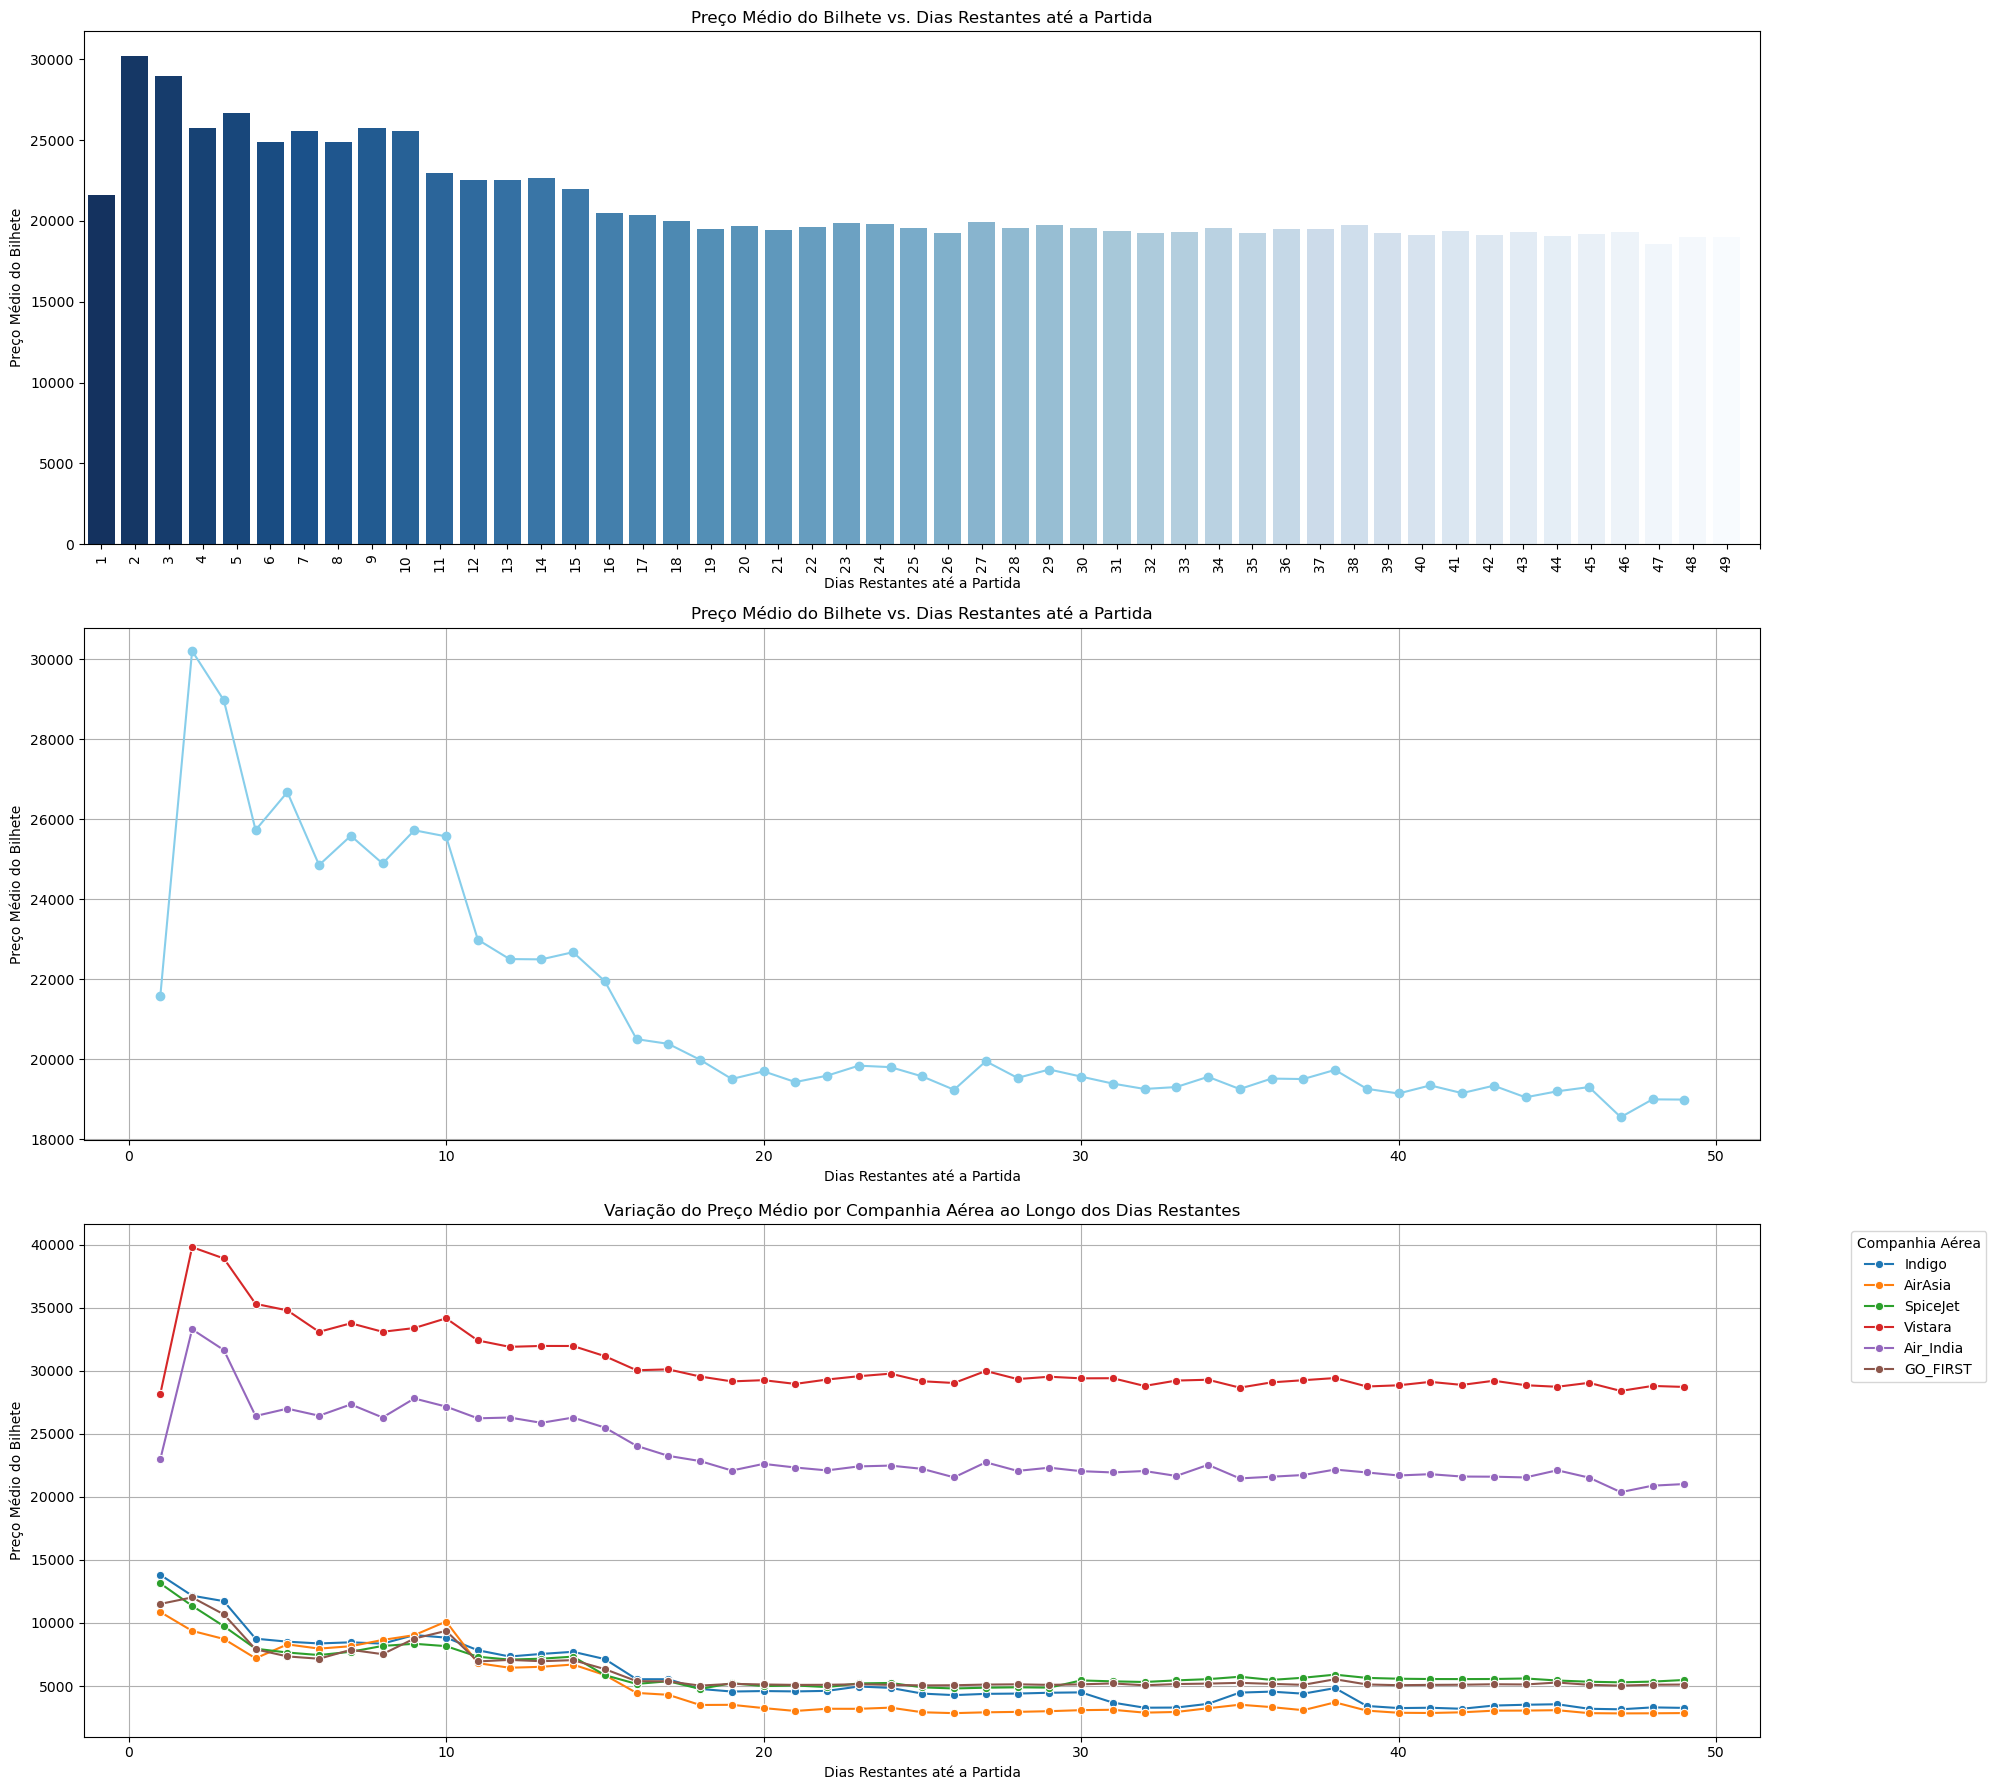

In [ ]:
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Agrupar os dados pelo número de dias restantes antes da partida e calcular o preço médio
days_left_avg_price = df.groupBy("days_left").agg(avg("price").alias("avg_price")).toPandas()

# Ordenar os valores para melhor visualização
days_left_avg_price = days_left_avg_price.sort_values("days_left")

# Criar a matriz 3x1 de subplots
fig, axes = plt.subplots(3, 1, figsize=(20, 18))

# Subplot 1: Gráfico de barras corrigido
sns.barplot(x='days_left', y='avg_price', hue='days_left', data=days_left_avg_price, palette='Blues_r', ax=axes[0], legend=False)
axes[0].set_xlabel('Dias Restantes até a Partida')
axes[0].set_ylabel('Preço Médio do Bilhete')
axes[0].set_title('Preço Médio do Bilhete vs. Dias Restantes até a Partida')
axes[0].set_xticks(range(0, int(days_left_avg_price["days_left"].max())+1, 1))
axes[0].tick_params(axis='x', rotation=90)

# Subplot 2: Gráfico de linha corrigido
sky_color = '#87CEEB'  # Azul claro para representar o céu
axes[1].plot(days_left_avg_price['days_left'].astype(int), days_left_avg_price['avg_price'], marker='o', color=sky_color)
axes[1].set_xlabel('Dias Restantes até a Partida')
axes[1].set_ylabel('Preço Médio do Bilhete')
axes[1].set_title('Preço Médio do Bilhete vs. Dias Restantes até a Partida')
axes[1].grid(True)

# Subplot 3: Variação de preços por companhia aérea ao longo dos dias restantes
airline_days_avg_price = df.groupBy("days_left", "airline").agg(avg("price").alias("avg_price")).toPandas()

sns.lineplot(
    data=airline_days_avg_price,
    x='days_left',
    y='avg_price',
    hue='airline',
    palette='tab10',
    marker='o',
    ax=axes[2]
)
axes[2].set_xlabel('Dias Restantes até a Partida')
axes[2].set_ylabel('Preço Médio do Bilhete')
axes[2].set_title('Variação do Preço Médio por Companhia Aérea ao Longo dos Dias Restantes')
axes[2].legend(title='Companhia Aérea', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].grid(True)

plt.tight_layout()
plt.show()


### 📌 Conclusões
A análise detalhada dos gráficos apresentados revela padrões claros de variação dos preços dos bilhetes conforme a antecedência da reserva, reforçando a importância do timing na compra das passagens aéreas.

Os insights extraídos podem ser divididos nas seguintes categorias:



### **1️⃣ Padrões Gerais de Preço ao Longo do Tempo**
- O preço médio dos bilhetes é significativamente mais alto nos dias imediatamente anteriores à partida, atingindo um pico máximo entre 1 e 3 dias antes do voo.
- À medida que a antecedência da reserva aumenta, observa-se uma redução progressiva nos preços, com uma estabilização após aproximadamente 20 dias antes do voo.
- Estes resultados sugerem que reservar com mais de 20 dias de antecedência é a melhor estratégia para garantir tarifas mais baixas.

### **2️⃣ Interpretação dos Gráficos**
#### 📊 Gráfico 1: Distribuição do Preço Médio por Dias Restantes
- A relação entre dias restantes e preço do bilhete mostra um declínio acentuado nos primeiros dias, com os preços a reduzirem gradualmente até se tornarem relativamente estáveis.
- Os preços atingem o seu ponto mais baixo entre 20 e 30 dias antes da partida, tornando-se a melhor janela de compra para os consumidores

#### 📉 Gráfico 2: Tendência Temporal da Variação dos Preços
- O gráfico de linha reforça a observação anterior, evidenciando uma queda mais acentuada nos primeiros 10 dias, seguida de uma estabilização.
- Pequenas oscilações nos preços após os 30 dias podem refletir promoções ou variações na procura, mas a tendência geral

#### 🏷️ Gráfico 3: Comparação entre Companhias Aéreas
- Companhias premium como Vistara e Air India mantêm preços consistentemente altos ao longo do tempo, independentemente da antecedência da compra.
- Companhias low-cost como Indigo, AirAsia e SpiceJet apresentam um padrão de descida mais pronunciado, com descontos mais significativos para reservas antecipadas.
- As empresas GO_FIRST e Indigo seguem uma estratégia de preços dinâmicos, com variações mais evidentes ao longo do tempo.

### **📊 Considerações finais**:
- Reservar com antecedência reduz significativamente o custo do bilhete, sendo 20 a 30 dias antes do voo o período ideal de compra.
- Companhias premium têm menor variação de preços, enquanto empresas low-cost oferecem descontos expressivos para reservas antecipadas.
- A decisão de compra deve considerar a estratégia de preços de cada companhia, combinando antecedência e escolha da operadora para obter o melhor custo-benefício.

---

## ***📌 Análise da Variação do Preço Médio dos Bilhetes por Período de Partida***

C:\Users\35191\AppData\Local\Temp\ipykernel_30484\2165430271.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='departure_time', y='avg_price', data=departure_avg_price, palette=palette, ax=axes[0])


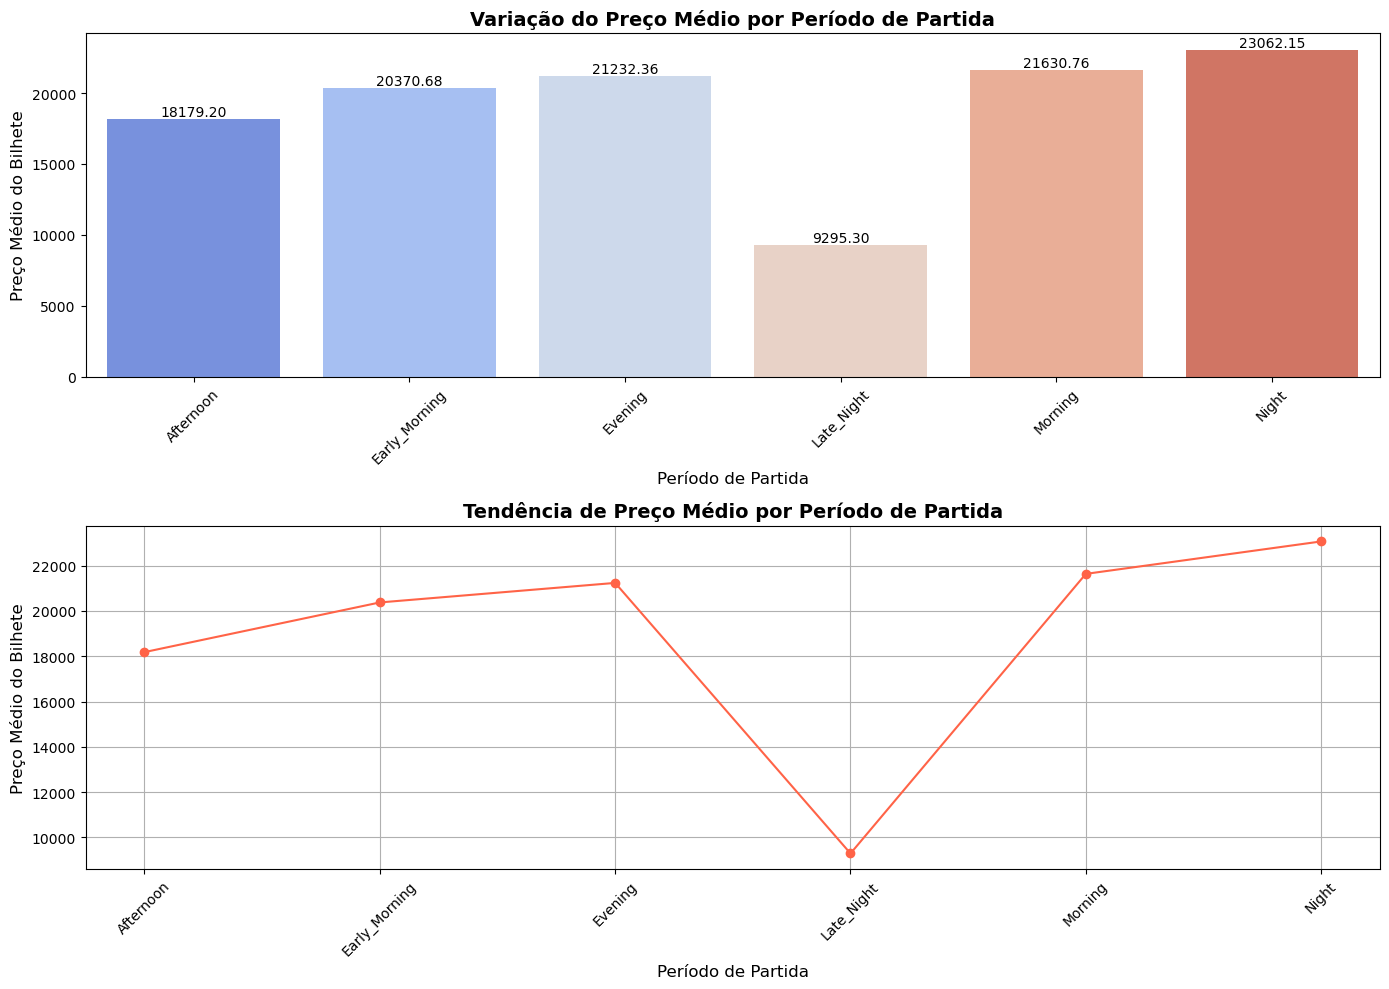

In [ ]:
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Agrupar os dados pelo período de partida e calcular o preço médio
departure_avg_price = df.groupBy("departure_time").agg(avg("price").alias("avg_price")).toPandas()

# Ordenar os valores para melhor visualização
departure_avg_price = departure_avg_price.sort_values("departure_time")

# Criar a matriz 2x1 de subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Definir uma paleta de cores otimizada
palette = sns.color_palette("coolwarm", len(departure_avg_price))

# Subplot 1: Gráfico de barras melhorado
sns.barplot(x='departure_time', y='avg_price', data=departure_avg_price, palette=palette, ax=axes[0])
axes[0].set_xlabel('Período de Partida', fontsize=12)
axes[0].set_ylabel('Preço Médio do Bilhete', fontsize=12)
axes[0].set_title('Variação do Preço Médio por Período de Partida', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Adicionar rótulos nas barras para melhor legibilidade
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

# Subplot 2: Gráfico de linha melhorado
sky_color = '#FF6347'  # Tom de vermelho para contrastar com o gráfico superior
axes[1].plot(departure_avg_price['departure_time'], departure_avg_price['avg_price'], marker='o', linestyle='-', color=sky_color)
axes[1].set_xlabel('Período de Partida', fontsize=12)
axes[1].set_ylabel('Preço Médio do Bilhete', fontsize=12)
axes[1].set_title('Tendência de Preço Médio por Período de Partida', fontsize=14, fontweight='bold')
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### 📌 Conclusões

A análise examina como o preço médio dos bilhetes varia conforme o período do dia em que o voo parte, identificando tendências e potenciais padrões de precificação.



### **1️⃣ Padrões Gerais dos Preços por Período de Partida**
- Os preços mais elevados ocorrem para voos que partem à noite (Night), com um preço médio de 23.062,15.
- O período da manhã (Morning) também apresenta preços elevados, 21.630,76, seguido do período da noite tardia (Evening), que se situa nos 21.232,36.
- Os preços mais baixos verificam-se nos voos que partem durante a madrugada (Late Night), com uma média significativamente inferior, 9.295,30.
- A tarde (Afternoon) e a madrugada cedo (Early Morning) apresentam valores intermédios, 18.179,20 e 20.370,68, respetivamente.

### **2️⃣ Interpretação dos Gráficos**
#### 📊 Gráfico 1: Comparação de Preço Médio por Período
- Este gráfico destaca claramente a diferença de preços entre os períodos do dia.
- A disparidade é evidente, com os voos noturnos e matinais a apresentarem preços mais elevados.
- O período late night é o mais económico, sugerindo que os voos nessa faixa horária podem ter menor procura.

#### 📉 Gráfico 2:  Evolução do Preço Médio ao Longo do Dia
- A tendência geral indica que os preços aumentam à medida que o dia avança.
- A maior queda nos preços ocorre no período da madrugada (Late Night), enquanto os valores mais elevados se registam à noite (Night).

### **3️⃣ Explicação dos Padrões de Preços**
- Os voos noturnos e matinais são mais caros porque são períodos de maior procura, especialmente para viagens de negócios.
- Os voos da madrugada (Late Night) são os mais baratos devido a uma procura reduzida e ao facto de serem horários menos convenientes.
- O período da tarde apresenta preços médios mais equilibrados, podendo representar uma opção interessante para quem quer evitar tarifas excessivamente altas.

### **📊 Considerações finais**:
- Os preços variam significativamente ao longo do dia, com os voos da madrugada sendo os mais baratos e os noturnos os mais caros.
- Há uma correlação entre a procura e o preço, sendo que horários mais convenientes tendem a apresentar tarifas mais elevadas.
- Tanto passageiros quanto companhias aéreas podem utilizar estas informações para tomar decisões estratégicas e otimizar os custos das viagens.
---

## ***📌 Impacto do Período de Chegada na Precificação dos Bilhetes***

C:\Users\35191\AppData\Local\Temp\ipykernel_30484\4053484163.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='arrival_time', y='avg_price', data=arrival_avg_price, palette=palette, ax=axes[0])


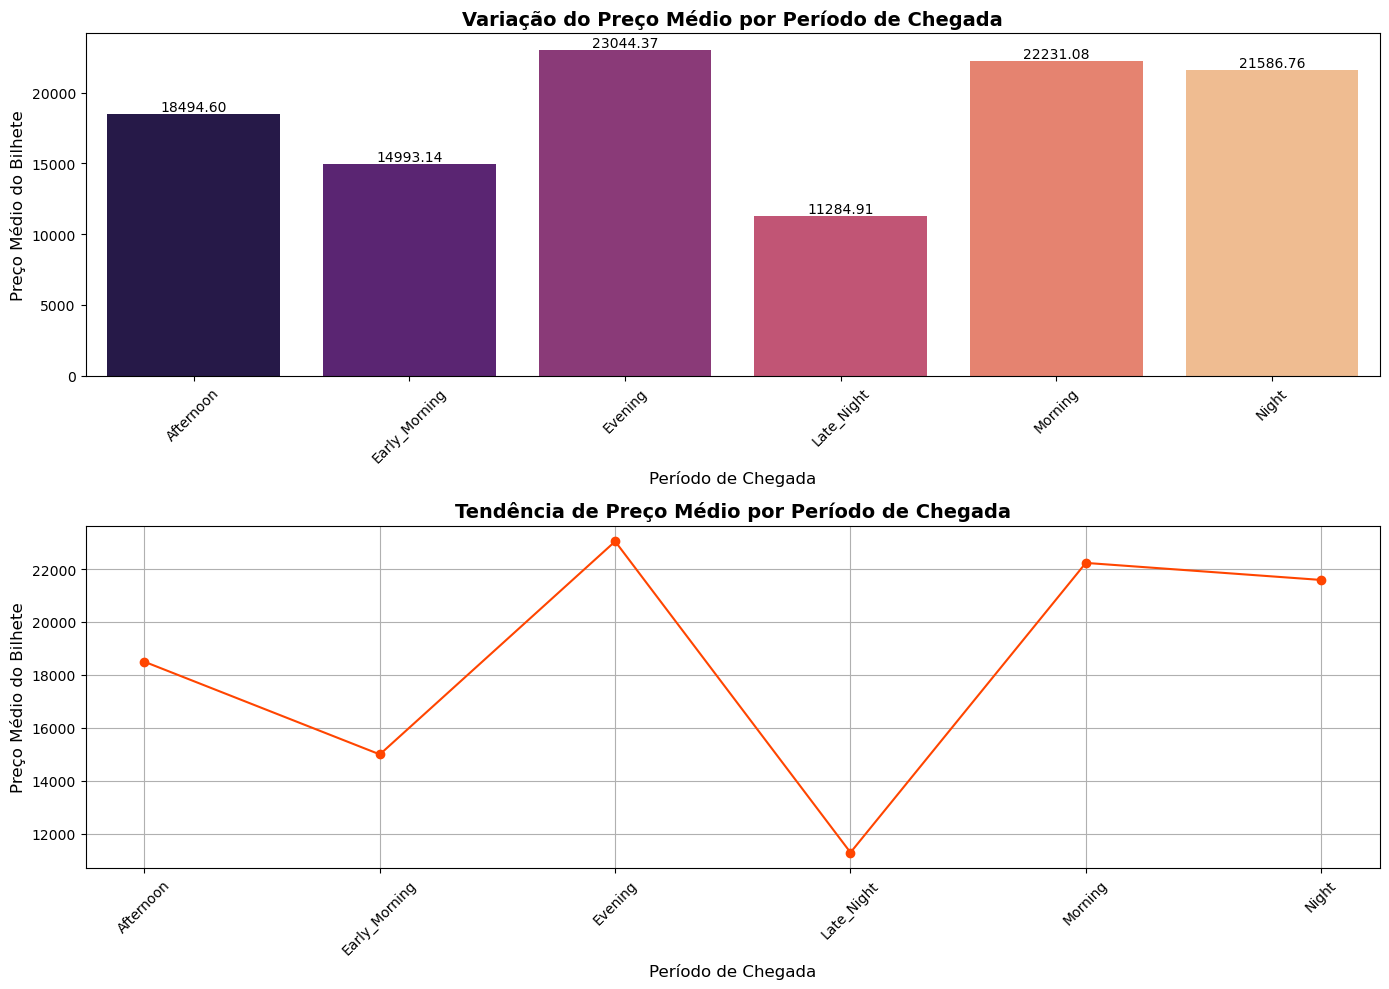

In [ ]:
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Agrupar os dados pelo período de chegada e calcular o preço médio
arrival_avg_price = df.groupBy("arrival_time").agg(avg("price").alias("avg_price")).toPandas()

# Ordenar os valores para melhor visualização
arrival_avg_price = arrival_avg_price.sort_values("arrival_time")

# Criar a matriz 2x1 de subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Definir uma paleta de cores otimizada
palette = sns.color_palette("magma", len(arrival_avg_price))

# Subplot 1: Gráfico de barras melhorado
sns.barplot(x='arrival_time', y='avg_price', data=arrival_avg_price, palette=palette, ax=axes[0])
axes[0].set_xlabel('Período de Chegada', fontsize=12)
axes[0].set_ylabel('Preço Médio do Bilhete', fontsize=12)
axes[0].set_title('Variação do Preço Médio por Período de Chegada', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Adicionar rótulos nas barras para melhor legibilidade
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

# Subplot 2: Gráfico de linha melhorado
sky_color = '#FF4500'  # Tom de laranja para um contraste forte
axes[1].plot(arrival_avg_price['arrival_time'], arrival_avg_price['avg_price'], marker='o', linestyle='-', color=sky_color)
axes[1].set_xlabel('Período de Chegada', fontsize=12)
axes[1].set_ylabel('Preço Médio do Bilhete', fontsize=12)
axes[1].set_title('Tendência de Preço Médio por Período de Chegada', fontsize=14, fontweight='bold')
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 📌 Conclusões

A análise examina como o preço médio dos bilhetes varia consoante o período do dia em que o voo chega ao destino, identificando padrões de precificação e potenciais tendências estratégicas.


### **1️⃣ Padrões Gerais dos Preços por Período de Chegada**
- O preço médio mais elevado ocorre para voos que chegam ao destino à noite (Evening), com um valor médio de 23.044,37.
- O período da manhã (Morning) e da noite (Night) também apresentam preços elevados, com 22.231,08 e 21.586,76, respetivamente.
- O preço médio mais baixo ocorre durante a madrugada (Late Night), com um valor de apenas 11.284,91, quase metade do preço médio dos períodos mais caros.
- O período da manhã cedo (Early Morning) apresenta valores reduzidos, 14.993,14, sendo a segunda opção mais económica.
- A tarde (Afternoon) regista valores intermédios, 18.494,60, representando um equilíbrio entre preço e conveniência.

### **2️⃣ Interpretação dos Gráficos**
#### 📊 Gráfico 1: Comparação de Preço Médio por Período de Chegada
- Este gráfico evidencia uma grande variação nos preços consoante o horário de chegada ao destino.
- Os voos que chegam à noite, de manhã ou no final do dia são mais caros.
- Os voos que chegam de madrugada são os mais económicos, indicando menor procura.

#### 📉 Gráfico 2:  Evolução do Preço Médio ao Longo do Dia
- A tendência mostra que o preço médio sobe consideravelmente ao longo do dia, atingindo o pico à noite (Evening).
- Os voos que chegam de madrugada são claramente os mais baratos, enquanto os que chegam durante a manhã ou à noite são mais caros.
- Existe uma grande oscilação entre os períodos, sugerindo que a precificação pode estar diretamente relacionada com a procura e a conveniência do horário de chegada.

### **3️⃣ Explicação dos Padrões de Preços**
- Os voos que chegam ao destino no período noturno ou matinal tendem a ser mais caros porque são horários populares para passageiros que viajam a trabalho ou querem aproveitar o dia.
- Os voos que chegam de madrugada apresentam os preços mais baixos, provavelmente devido à menor procura e ao menor interesse em voos que exigem deslocações a horários inconvenientes.
- O período da tarde apresenta preços medianos, sugerindo que pode ser uma opção equilibrada entre conveniência e custo.

### **📊 Considerações finais**:
- Os preços variam significativamente consoante o horário de chegada ao destino, com os voos noturnos e matinais a serem os mais caros.
- Os voos de madrugada são substancialmente mais baratos, sendo uma opção viável para passageiros que procuram economizar.
- Tanto passageiros quanto companhias aéreas podem utilizar esta informação para tomar decisões estratégicas na escolha de voos e na gestão de tarifas.
---

## ***📌Relação entre Período de Partida e Chegada na Precificação dos Bilhetes***

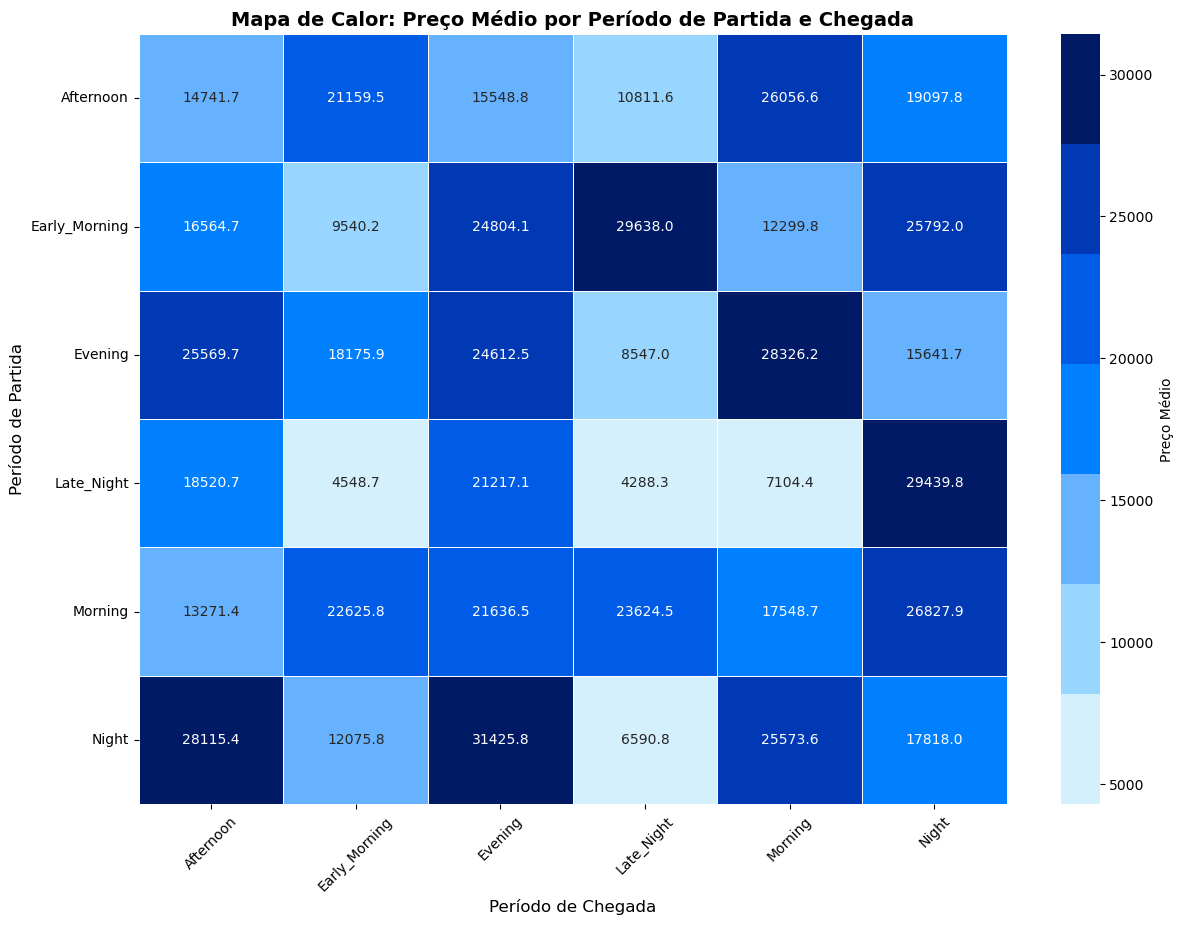

In [ ]:
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Agrupar os dados pelo período de partida e chegada e calcular o preço médio
departure_arrival_avg_price = df.groupBy("departure_time", "arrival_time").agg(avg("price").alias("avg_price")).toPandas()

# Criar a pivot table para visualização
departure_arrival_pivot = departure_arrival_avg_price.pivot(index="departure_time", columns="arrival_time", values="avg_price").fillna(0)

# Definir uma paleta de cores personalizada para melhor visualização
colors = ["#D4F0FD", "#99D6FF", "#66B2FF", "#0080FF", "#005CE6", "#0039B3", "#001A66"]

# Criar um heatmap melhorado
plt.figure(figsize=(14, 10))
sns.heatmap(departure_arrival_pivot, cmap=sns.color_palette(colors), annot=True, fmt=".1f", linewidths=0.5, linecolor='white', cbar_kws={'label': 'Preço Médio'})

# Melhorar a estética do gráfico
plt.title('Mapa de Calor: Preço Médio por Período de Partida e Chegada', fontsize=14, fontweight='bold')
plt.xlabel('Período de Chegada', fontsize=12)
plt.ylabel('Período de Partida', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()


### 📌 Conclusões

Este mapa de calor apresenta a relação entre os períodos de partida e chegada dos voos e o respetivo preço médio dos bilhetes. A análise permite identificar combinações de horários mais económicas e mais dispendiosas, fornecendo insights estratégicos para passageiros e companhias aéreas.


### **1️⃣ Padrões Gerais dos Preços por Período de Partida e Chegada**
- Os preços mais elevados encontram-se em voos que partem à noite e chegam ao final do dia (Night → Evening), com valores acima dos 31.000.
- Os voos mais baratos são os que partem e chegam de madrugada (Late Night → Late Night), com preços médios abaixo dos 5.000.
- Existe uma tendência de preços elevados para voos que partem ao fim do dia e chegam no dia seguinte, especialmente para Night → Afternoon e Evening → Night.
- Voos que partem cedo de manhã e chegam à noite também apresentam valores elevados, sugerindo uma maior procura para voos longos e de grande conveniência.

### **1️⃣Principais Tendências de Preços**
🔹 Voos Mais Caros:
- Partidas Noturnas com Chegada à Noite ou ao Final do Dia (Night → Evening, Night → Night).
- Partidas no Final do Dia com Chegada de Manhã ou à Noite (Evening → Morning, Evening → Night).
- Estes horários correspondem a períodos de alta procura, utilizados por passageiros que necessitam de maior flexibilidade ou querem aproveitar o dia no destino.

🔹 Voos Mais Económicos:
- Voos que partem e chegam de madrugada (Late Night → Late Night).
- Partidas de manhã cedo e chegada no início da tarde (Early Morning → Afternoon).
- Chegada tardia após um voo matinal (Morning → Late Night).
- Estes padrões sugerem que passageiros dispostos a viajar a horas menos convenientes conseguem tarifas mais acessíveis.
- Partidas no Final do Dia com Chegada de Manhã ou à Noite (Evening → Morning, Evening → Night).
- Estes horários correspondem a períodos de alta procura, utilizados por passageiros que necessitam de maior flexibilidade ou querem aproveitar o dia no destino.



### **2️⃣ Explicação da Variação de Preços**
- A elevada procura por horários de chegada mais convenientes faz com que os preços dos bilhetes sejam superiores, especialmente em períodos noturnos e no final do dia.
- Voos que exigem deslocações de madrugada são significativamente mais baratos, provavelmente devido ao menor conforto e conveniência.
- Passageiros que priorizam viagens económicas podem tirar vantagem de voos que partem e chegam em horários de menor procura, como a madrugada e início da manhã.

### **📊 Considerações finais**:
- A relação entre período de partida e chegada influencia significativamente o preço dos bilhetes.
- Voos noturnos e no final do dia são mais caros, enquanto voos que partem e chegam de madrugada são os mais económicos.
- Passageiros podem otimizar custos escolhendo horários de menor procura, enquanto companhias aéreas podem ajustar a precificação para maximizar a ocupação e a rentabilidade.
---

## ***📌 Variação dos Preços dos Bilhetes por Cidade de Origem***

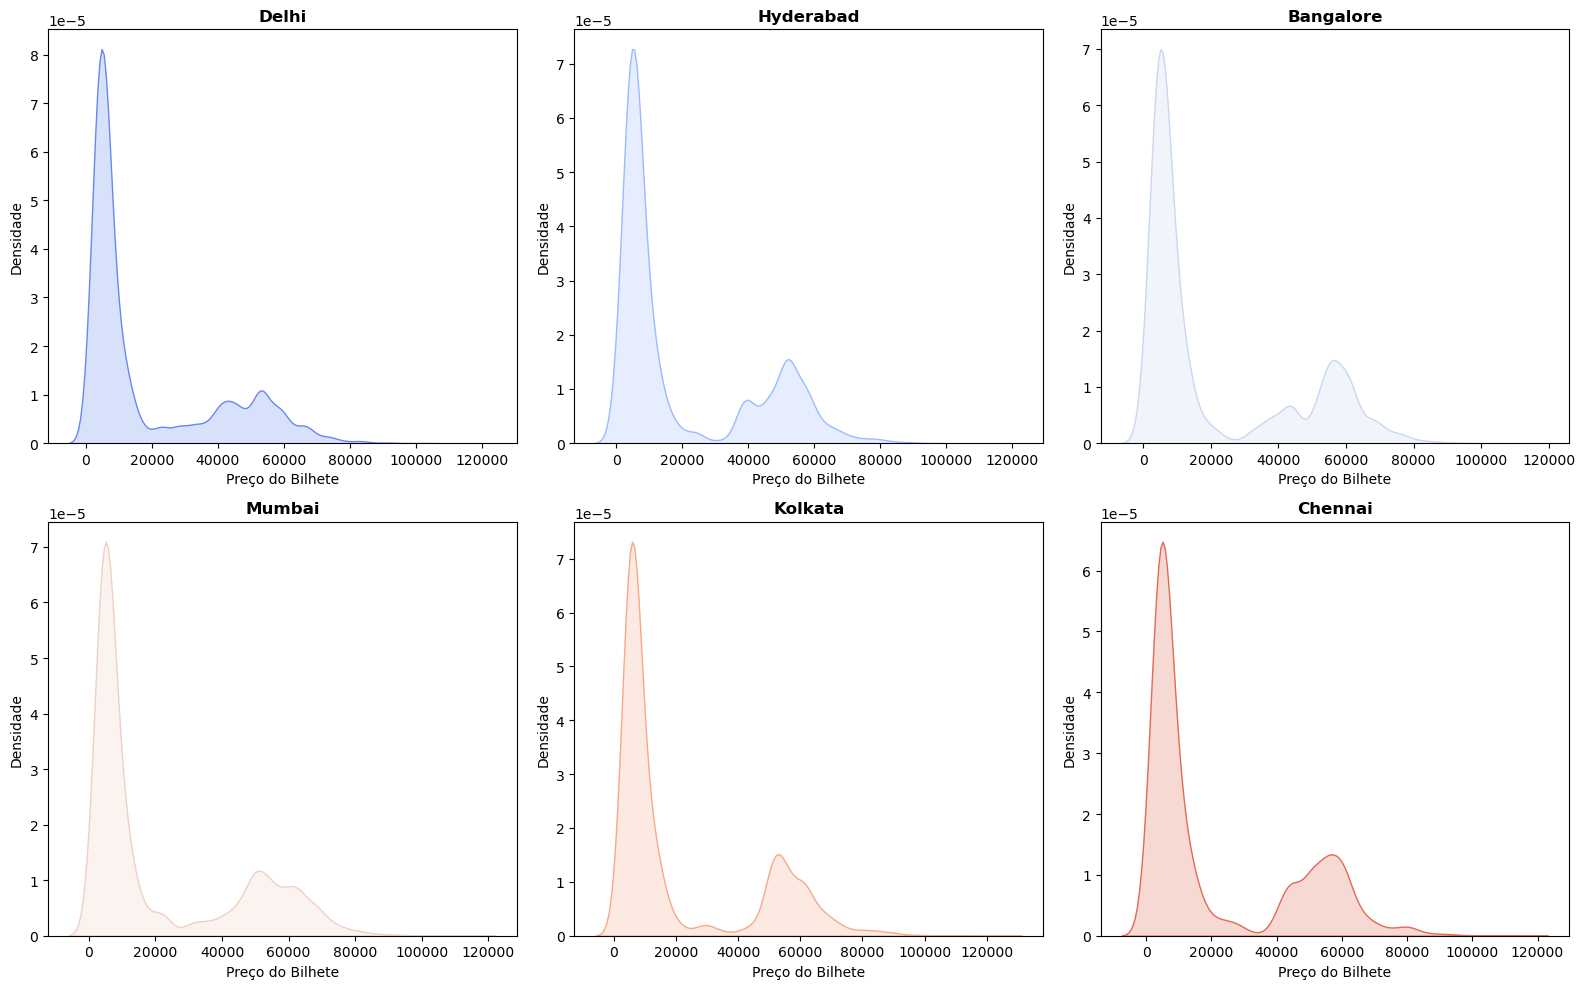

C:\Users\35191\AppData\Local\Temp\ipykernel_30484\1149012090.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


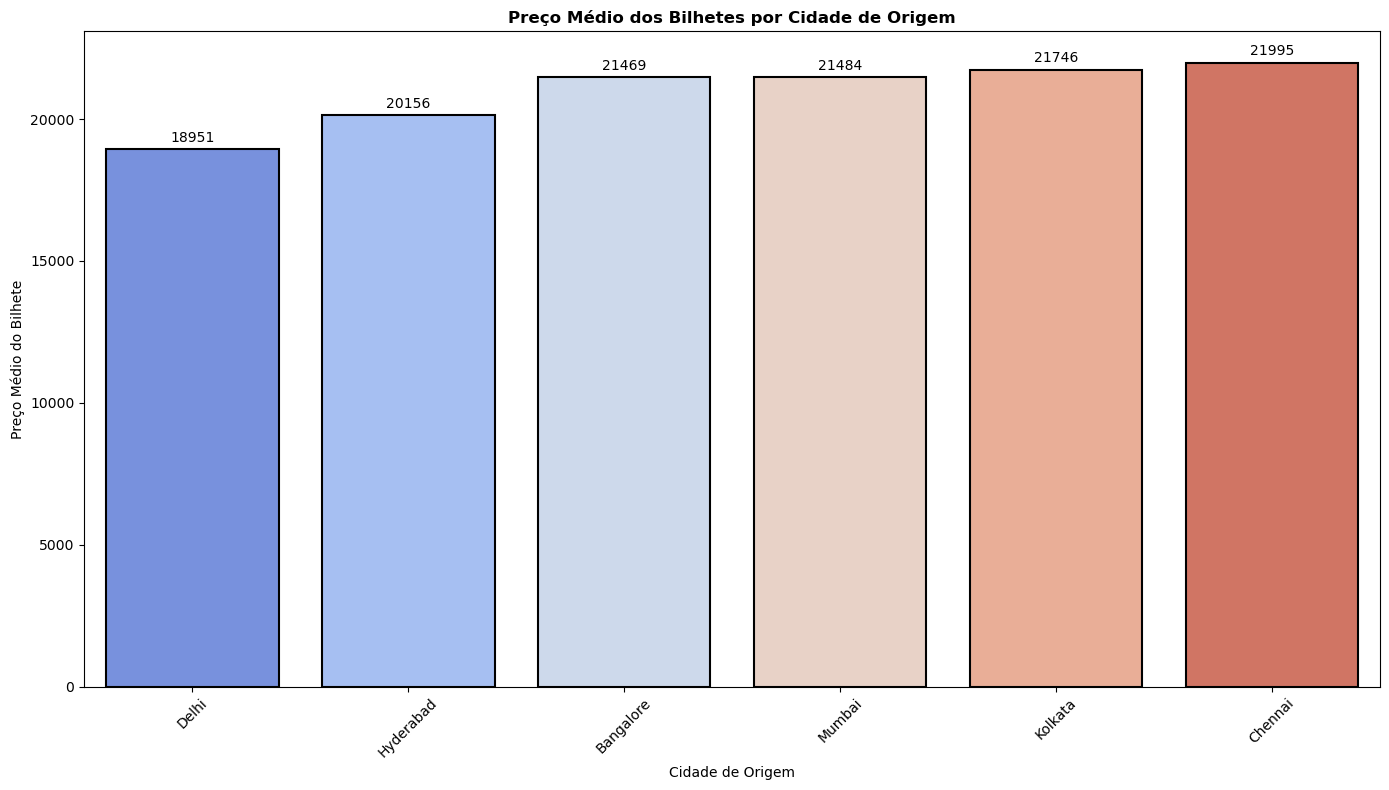

In [ ]:
from pyspark.sql.functions import col, mean
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Agrupar os dados por cidade de origem e calcular o preço médio
source_city_avg_price = df.groupBy("source_city").agg(mean("price").alias("avg_price")).toPandas()

# Ordenar os valores para melhor visualização
source_city_avg_price = source_city_avg_price.sort_values("avg_price", ascending=True)

# Criar a figura com subplots para gráficos KDE
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# Definir uma paleta de cores para diferenciar as cidades
palette = sns.color_palette("coolwarm", len(source_city_avg_price))

# Criar gráficos KDE para cada cidade de origem
for i, city in enumerate(source_city_avg_price["source_city"]):
    city_data = df.filter(col("source_city") == city).select("price").toPandas()
    sns.kdeplot(city_data["price"], fill=True, color=palette[i], ax=axes[i])
    axes[i].set_title(city, fontweight='bold')
    axes[i].set_xlabel("Preço do Bilhete")
    axes[i].set_ylabel("Densidade")

plt.tight_layout()
plt.show()

# Criar gráfico de barras para o preço médio por cidade de origem
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=source_city_avg_price,
    x='source_city',
    y='avg_price',
    palette=palette,
    linewidth=1.5,
    edgecolor='black'
)

# Adicionar rótulos diretamente nas barras
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f', fontsize=10, padding=3)

# Configurar título e rótulos do gráfico
plt.title('Preço Médio dos Bilhetes por Cidade de Origem', fontweight='bold')
plt.xlabel('Cidade de Origem')
plt.ylabel('Preço Médio do Bilhete')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 📌 Conclusões

Nesta análise, exploramos como os preços médios dos bilhetes variam conforme a cidade de origem do voo, identificando padrões e possíveis razões para essas variações.


### **1️⃣ Distribuição de Preços por Cidade de Origem**
- A distribuição de preços é assimétrica, com a maioria das passagens concentradas em valores mais baixos, mas com caudas longas para preços mais altos.
- Picos de preços elevados são visíveis em todas as cidades, sugerindo a presença de classes premium e/ou voos de longa distância.

### ***2️⃣ Preço Médio por Cidade de Origem**
- Chennai tem o preço médio mais alto (21.995), seguida de Kolkata (21.746), Mumbai (21.484) e Bangalore (21.469).
- Delhi e Hyderabad têm preços médios ligeiramente inferiores (18.951 e 20.156, respetivamente).

### **3️⃣ Padrões Observados**
- Cidades como Chennai e Kolkata apresentam preços médios mais elevados, o que pode estar relacionado com a oferta de voos mais longos ou uma maior proporção de bilhetes premium.
- Delhi e Hyderabad têm preços ligeiramente mais acessíveis, sugerindo maior concorrência entre companhias aéreas e maior volume de voos domésticos.
- A distribuição dos preços indica que todas as cidades apresentam bilhetes premium, mas a concentração de valores mais baixos é mais evidente em cidades como Delhi e Hyderabad.

### **📊 Considerações finais**:
- A cidade de origem influencia significativamente o preço médio dos bilhetes, sendo Chennai e Kolkata os locais mais caros para iniciar uma viagem.
- A presença de voos premium pode justificar preços mais elevados nestas cidades, enquanto cidades com maior tráfego aéreo e concorrência tendem a apresentar tarifas mais acessíveis.
- Passageiros podem considerar a possibilidade de viajar a partir de cidades vizinhas para reduzir custos, especialmente em casos onde as diferenças de preço sejam significativas.
---

## ***📌 Variação dos Preços dos Bilhetes por Cidade de Destino***

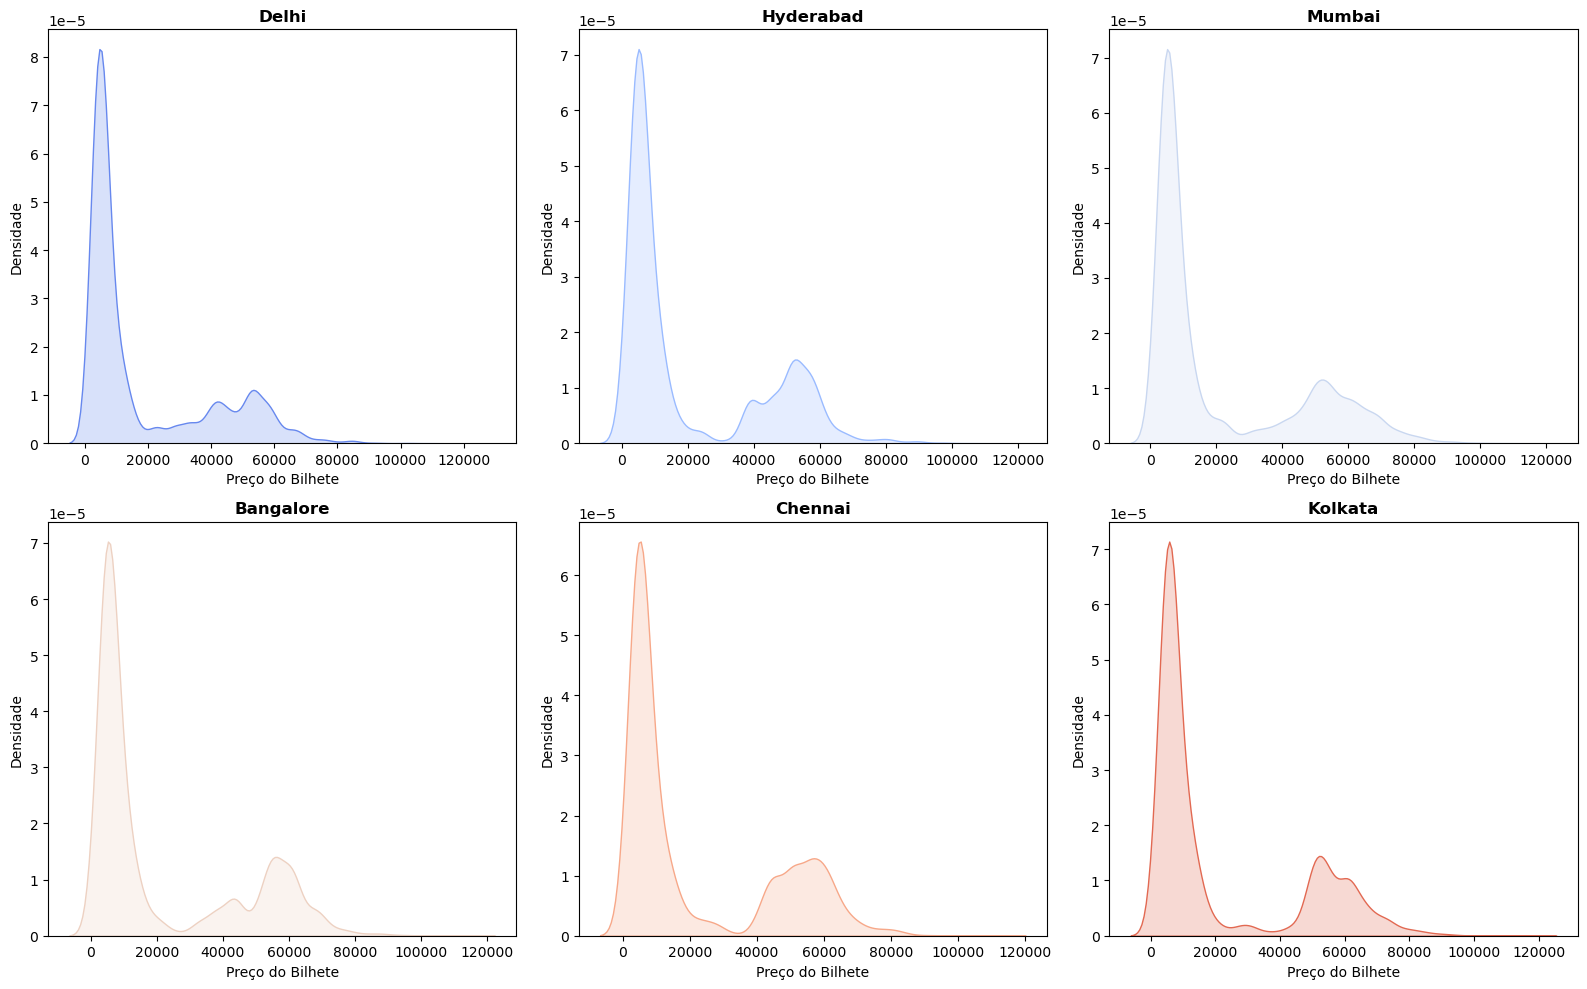

C:\Users\35191\AppData\Local\Temp\ipykernel_30484\1417316162.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


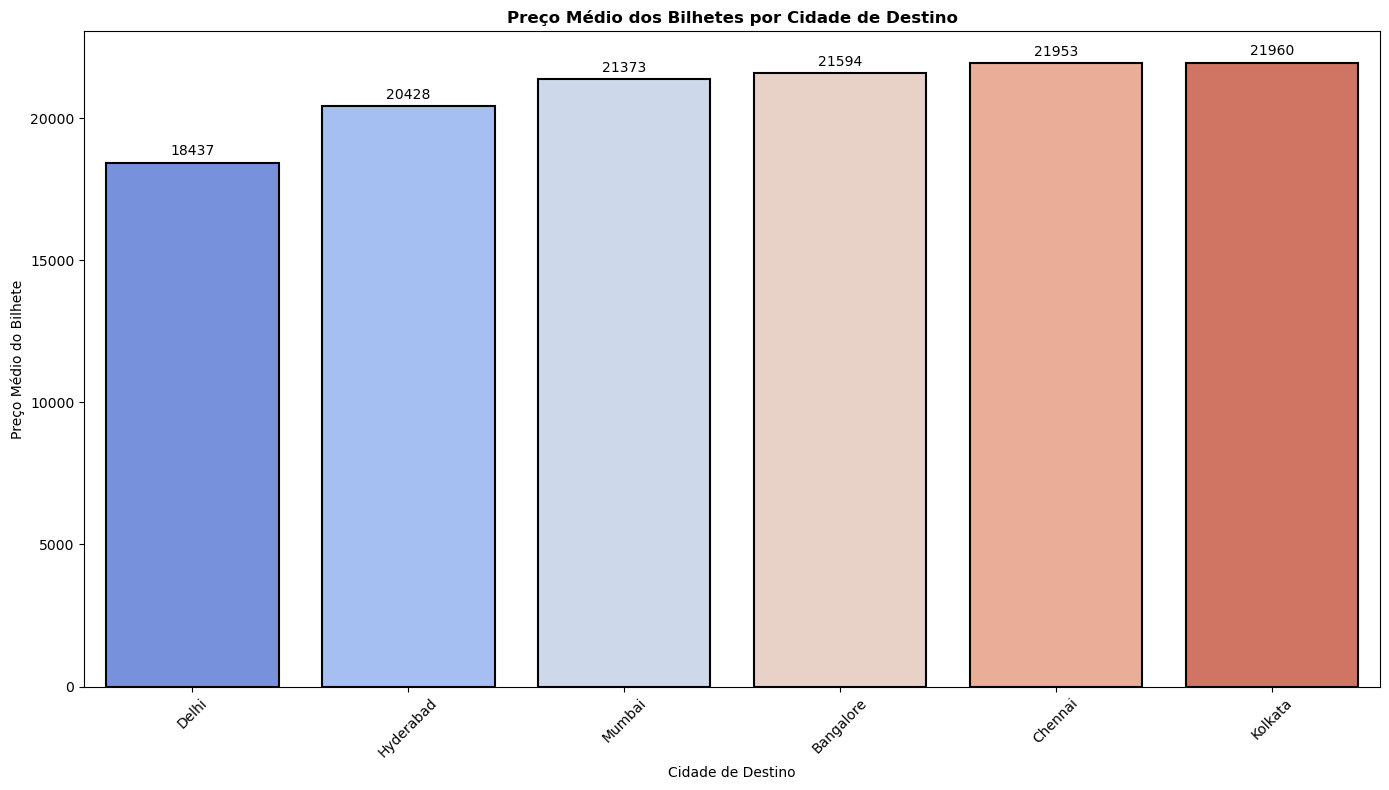

In [ ]:
from pyspark.sql.functions import col, mean
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Agrupar os dados por cidade de destino e calcular o preço médio
destination_city_avg_price = df.groupBy("destination_city").agg(mean("price").alias("avg_price")).toPandas()

# Ordenar os valores para melhor visualização
destination_city_avg_price = destination_city_avg_price.sort_values("avg_price", ascending=True)

# Criar a figura com subplots para gráficos KDE
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# Definir uma paleta de cores para diferenciar as cidades
palette = sns.color_palette("coolwarm", len(destination_city_avg_price))

# Criar gráficos KDE para cada cidade de destino
for i, city in enumerate(destination_city_avg_price["destination_city"]):
    city_data = df.filter(col("destination_city") == city).select("price").toPandas()
    sns.kdeplot(city_data["price"], fill=True, color=palette[i], ax=axes[i])
    axes[i].set_title(city, fontweight='bold')
    axes[i].set_xlabel("Preço do Bilhete")
    axes[i].set_ylabel("Densidade")

plt.tight_layout()
plt.show()

# Criar gráfico de barras para o preço médio por cidade de destino
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=destination_city_avg_price,
    x='destination_city',
    y='avg_price',
    palette=palette,
    linewidth=1.5,
    edgecolor='black'
)

# Adicionar rótulos diretamente nas barras
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f', fontsize=10, padding=3)

# Configurar título e rótulos do gráfico
plt.title('Preço Médio dos Bilhetes por Cidade de Destino', fontweight='bold')
plt.xlabel('Cidade de Destino')
plt.ylabel('Preço Médio do Bilhete')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 📌 Conclusões

Nesta análise, exploramos como os preços médios dos bilhetes variam conforme a cidade de origem do voo, identificando padrões e possíveis razões para essas variações.


### **1️⃣ Distribuição dos Preços por Cidade de Destino**
- As distribuições de preços nos gráficos de densidade mostram que há uma grande concentração de bilhetes na faixa de valores mais baixos (até ~20.000) para todas as cidades analisadas.
- No entanto, todas as cidades também apresentam picos secundários na faixa de 40.000 a 60.000, sugerindo a existência de bilhetes significativamente mais caros para determinadas rotas ou classes de voo.
- Mumbai e Hyderabad parecem apresentar uma maior dispersão de preços, indicando que podem existir mais variações de tarifas conforme a companhia aérea, horário do voo e classe tarifária.

### ***2️⃣ Preço Médio dos Bilhetes por Cidade de Destino**
- O gráfico de barras confirma que Delhi tem os bilhetes mais acessíveis, com um preço médio de aproximadamente 18.437.
- Por outro lado, destinos como Kolkata e Chennai apresentam os preços médios mais elevados, superando os 21.900.
- A diferença entre a cidade mais barata e a mais cara é de aproximadamente 3.500 unidades monetárias, o que pode ser explicado por diferenças na procura e nas rotas operadas.

### **3️⃣ Padrões Observados**
- Cidades com maior tráfego aéreo (como Delhi e Mumbai) podem apresentar preços médios mais baixos devido à maior concorrência entre companhias aéreas e maior oferta de voos.
- Cidades menos servidas por voos diretos podem ter preços médios mais elevados, já que os passageiros podem precisar de conexões ou enfrentar menor concorrência entre transportadoras.
- A demanda turística e corporativa também pode afetar os preços, com cidades que possuem mais procura para viagens de negócios ou eventos podendo ter tarifas médias mais altas.

### **📊 Considerações finais**:
- Passageiros que desejam economizar podem considerar voos para Delhi, onde os preços médios são mais baixos.
- Voos para Kolkata e Chennai tendem a ser mais caros, exigindo maior atenção na hora da reserva.
- A variação de preços reforça a necessidade de estratégias de compra, como reserva antecipada e comparação entre companhias aéreas.
---

## ***📌 Influência da Classe na Definição dos Preços dos Bilhetes***

C:\Users\35191\AppData\Local\Temp\ipykernel_30484\4176374817.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=class_avg_price, x='class', y='avg_price', palette=palette, linewidth=1.5, edgecolor='black', ax=axes[0, 0])


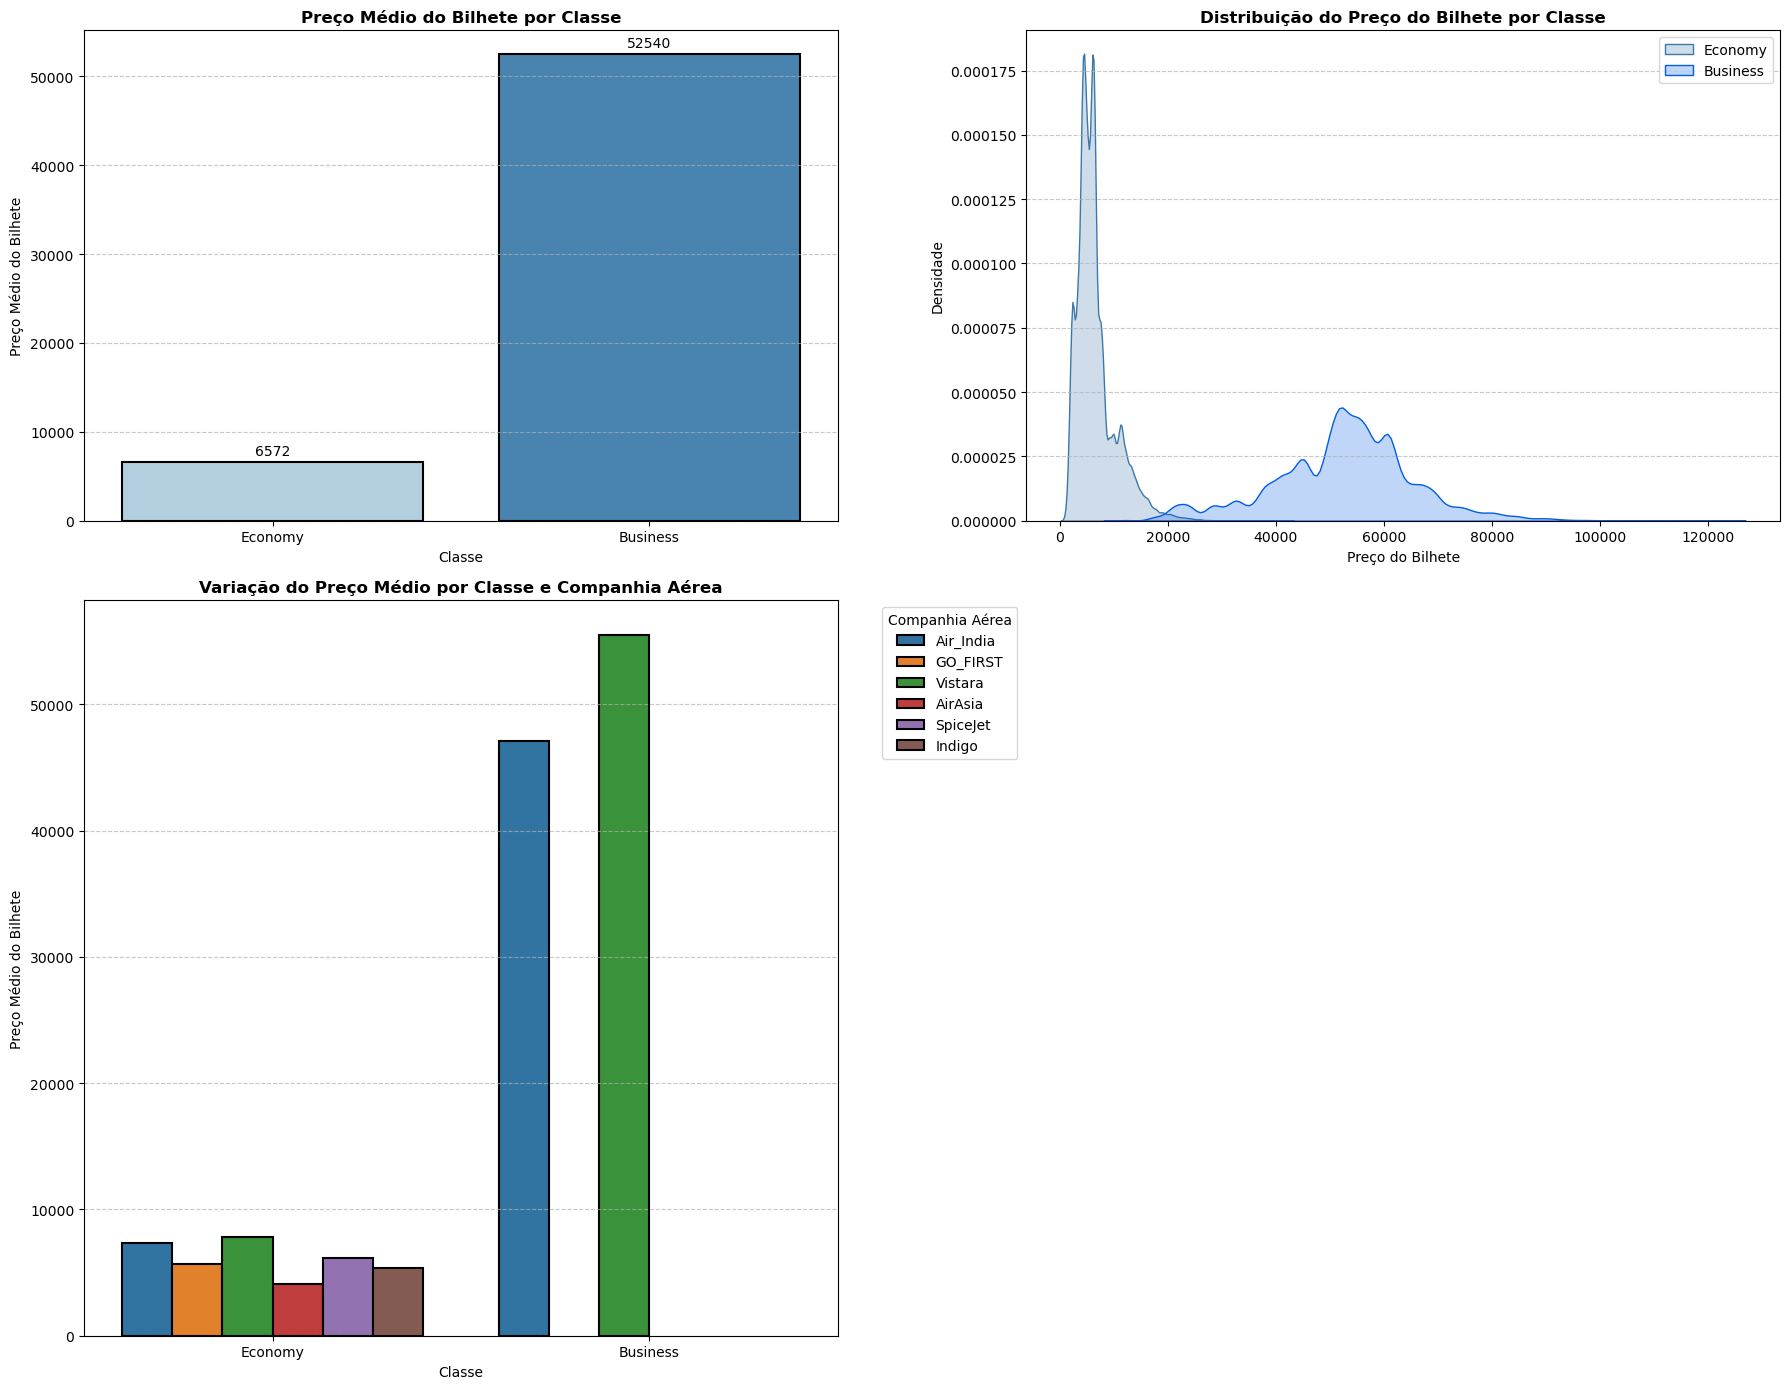

In [ ]:
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Converter os dados para Pandas
df_pandas = df.toPandas()

# Criar um dicionário para armazenar os preços por classe
class_dict = {}
classes = df_pandas['class'].unique()

for class_name in classes:
    class_dict[class_name] = df_pandas[df_pandas['class'] == class_name]['price']

# Criar a matriz de gráficos: 1ª linha com 2 gráficos lado a lado, 2ª linha com 1 gráfico maior
fig, axes = plt.subplots(2, 2, figsize=(18, 14), gridspec_kw={'height_ratios': [1, 1.5]})

# Gráfico 1 (esquerda): Preço médio por classe
class_avg_price = df.groupBy("class").agg(avg("price").alias("avg_price")).toPandas()
class_avg_price = class_avg_price.sort_values("avg_price")

palette = sns.color_palette('Blues', n_colors=len(class_avg_price))
sns.barplot(data=class_avg_price, x='class', y='avg_price', palette=palette, linewidth=1.5, edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Preço Médio do Bilhete por Classe', fontweight='bold')
axes[0, 0].set_xlabel('Classe')
axes[0, 0].set_ylabel('Preço Médio do Bilhete')
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos diretamente nas barras
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fmt='%.0f', fontsize=10, padding=3)

# Gráfico 2 (direita): Distribuição dos preços por classe (KDE)
sns.kdeplot(x=class_dict['Economy'], fill=True, label='Economy', color='#3C78A8', ax=axes[0, 1])
sns.kdeplot(x=class_dict['Business'], fill=True, label='Business', color='#005CE6', ax=axes[0, 1])
axes[0, 1].set_title('Distribuição do Preço do Bilhete por Classe', fontweight='bold')
axes[0, 1].set_xlabel('Preço do Bilhete')
axes[0, 1].set_ylabel('Densidade')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 3 (embaixo, maior): Variação do preço médio por classe e companhia aérea
class_airline_avg_price = df.groupBy("class", "airline").agg(avg("price").alias("avg_price")).toPandas()

sns.barplot(
    data=class_airline_avg_price,
    x='class',
    y='avg_price',
    hue='airline',
    palette='tab10',
    linewidth=1.5,
    edgecolor='black',
    ax=axes[1, 0]
)
axes[1, 0].set_title('Variação do Preço Médio por Classe e Companhia Aérea', fontweight='bold')
axes[1, 0].set_xlabel('Classe')
axes[1, 0].set_ylabel('Preço Médio do Bilhete')
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)
axes[1, 0].legend(title='Companhia Aérea', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar layout para melhor apresentação
fig.delaxes(axes[1, 1])  # Remover gráfico vazio (coluna 2 da linha 2)
plt.tight_layout()
plt.show()


### 📌 Conclusões

Os gráficos apresentados analisam como a classe dos bilhetes afeta os preços médios, considerando tanto a distribuição geral quanto as variações entre as companhias aéreas.

### **1️⃣ Diferença Significativa nos Preços Entre Classes**
- Há uma diferença marcante entre os preços das classes Economy e Business.
- O preço médio na classe Business (52.540) é quase 8 vezes superior ao preço médio da classe Economy (6.572).
- A classe Business reflete um segmento premium destinado a passageiros dispostos a pagar mais por conforto, serviços exclusivos e maior flexibilidade nas passagens.

### ***2️⃣ Distribuição dos Preços Dentro de Cada Classe**
- A classe Economy tem uma distribuição mais concentrada, com a maioria dos bilhetes situados em faixas abaixo dos 10.000.
- A classe Business apresenta uma distribuição muito mais ampla, com preços que podem ultrapassar 100.000, indicando uma grande variação nas tarifas conforme a companhia aérea e a disponibilidade.

### **3️⃣ Variação do Preço Médio por Companhia Aérea**
- Vistara e Air India dominam a classe Business, apresentando os preços mais altos.
- As companhias low-cost, como AirAsia e SpiceJet, oferecem tarifas significativamente mais baixas, majoritariamente na classe Economy.
- Empresas como Indigo e GO_FIRST apresentam uma faixa de preços equilibrada, mas com valores mais próximos da classe Economy.

### **📊 Considerações finais**:
- A escolha da classe é o fator mais determinante na definição do preço do bilhete.
- Viajantes com orçamento reduzido devem focar-se na classe Economy e em companhias low-cost.
- Empresas premium como Vistara e Air India direcionam-se a um público disposto a pagar mais pela experiência Business.
- A segmentação de preços entre as companhias evidencia estratégias distintas de mercado, com algumas a focarem-se na acessibilidade e outras na experiência de alto padrão.

---

# ***📌 Capítulo: "Preparação dos Dados para Modelação Preditiva"***
Agora que realizámos a primeira análise exploratória do dataset, vamos avançar para a preparação dos dados para a modelação preditiva.

Todas as variáveis estão no formato adequado.
Variáveis categóricas são convertidas para valores numéricos.
Variáveis irrelevantes são removidas para evitar ruído no modelo.
O dataset está pronto para a análise e construção dos modelos.

### **Objetivo desta Secção**
O objetivo é preparar os dados para que possam ser usados em modelos de Machine Learning, garantindo que:

-  **Todas as variáveis estão no formato adequado.**
  
- **Variáveis categóricas são convertidas para valores numéricos.**
  
- **Variáveis irrelevantes são removidas para evitar ruído no modelo.**
  
- **O dataset está pronto para a análise e construção dos modelos.**

### ***📌 Análise Inicial dos Dados***

Antes de iniciarmos a transformação dos dados, fazemos uma análise detalhada das variáveis, garantindo que compreendemos quais precisam de tratamento.

#### ***📌 Estrutura do Dataset***

Antes de transformar os dados, verificamos a estrutura do dataset para compreender os tipos de dados presentes.

In [ ]:
df.printSchema()

root
 |-- airline: string (nullable = true)
 |-- flight: string (nullable = true)
 |-- source_city: string (nullable = true)
 |-- departure_time: string (nullable = true)
 |-- stops: string (nullable = true)
 |-- arrival_time: string (nullable = true)
 |-- destination_city: string (nullable = true)
 |-- class: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- days_left: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- flight_type: string (nullable = false)



#### ***📌 Identificação das Variáveis a Transformar***

Após analisar o dataset, identificámos que algumas colunas são categóricas e precisam de ser convertidas para valores numéricos, enquanto que outras colunas já estão no formato adequado e não precisam de transformação.

Abaixo está um resumo das variáveis e as ações que tomaremos:
- **Identificação das Variáveis a Transformar e a Remover**
- **Definir um plano claro sobre o que fazer com cada variável.**

| Coluna          | Tipo    | Ação        | Justificação                                           |
|----------------|--------|------------|-------------------------------------------------------|
| airline        | String | Transformar | Companhia aérea (categórica)                          |
| flight         | String | Remover     | Apenas um identificador, não relevante               |
| source_city    | String | Transformar | Cidade de origem do voo                              |
| departure_time | String | Transformar | Momento do dia em que o voo parte                   |
| stops          | String | Transformar | Número de escalas (existe uma versão numérica: stops_mapped) |
| arrival_time   | String | Transformar | Momento do dia em que o voo chega                   |
| destination_city | String | Transformar | Cidade de destino                                   |
| class          | String | Transformar | Classe do bilhete (Económica ou Executiva)          |
| duration       | Double | Manter      | Já está no formato adequado                         |
| days_left      | Integer | Manter      | Já está no formato adequado                         |
| price          | Integer | Manter      | Variável target (preço)                             |
| flight_type    | String | Transformar | Tipo de voo (Curto ou Longo)                        |
| stops_mapped   | Integer | Manter      | Versão numérica da coluna 'stops'                   |


#### ***📌 Ações:***

**Transformar:**
- airline.
- source_city
- departure_time
- stops
- arrival_time
- destination_city
- class
- flight_type

**Remover:**
- flight (Apenas um identificador, não útil para o modelo).

**Manter sem transformação:**
- duration, days_left, price, stops_mapped (já estão no formato correto).

***📌  Remoção da Coluna flight***

A coluna "flight" contém apenas identificadores dos voos e **não contribui para a previsão do preço**. Por isso, removemo-la do dataset.

In [ ]:
# 📌 Verificar o tipo do DataFrame antes da remoção da coluna
print("Tipo do DataFrame antes da remoção:", type(df))

# 📌 Remover a coluna "flight"
df = df.drop("flight")

# 📌 Verificar o tipo do DataFrame depois da remoção da coluna
print("Tipo do DataFrame depois da remoção:", type(df))

# 📌 Exibir o esquema atualizado do DataFrame
df.printSchema()


Tipo do DataFrame antes da remoção: <class 'pyspark.sql.dataframe.DataFrame'>
Tipo do DataFrame depois da remoção: <class 'pyspark.sql.dataframe.DataFrame'>
root
 |-- airline: string (nullable = true)
 |-- source_city: string (nullable = true)
 |-- departure_time: string (nullable = true)
 |-- stops: string (nullable = true)
 |-- arrival_time: string (nullable = true)
 |-- destination_city: string (nullable = true)
 |-- class: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- days_left: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- flight_type: string (nullable = false)



Agora que removemos a coluna irrelevante, podemos avançar para a transformação das variáveis categóricas.

### ***📌 Transformação das Variáveis Categóricas***

Como os modelos de Machine Learning não trabalham com texto, precisamos de converter as variáveis categóricas em valores numéricos.

***📌  Técnicas de Transformação***

Existem duas técnicas principais para converter variáveis categóricas:

| Técnica           | O que faz?                                       | Quando usar?                                                | Problemas                          |
|------------------|------------------------------------------------|------------------------------------------------|----------------------------------|
| Label Encoding  | Atribui um número inteiro a cada categoria.    | Quando há uma relação de ordem (ex: Pequeno, Médio, Grande). | Pode induzir hierarquia errada. |
| One-Hot Encoding | Cria colunas binárias para cada categoria.    | Quando não há relação de ordem (ex: Companhias aéreas, cidades). | Pode aumentar o número de colunas.



Como não existe uma hierarquia lógica entre as categorias, One-Hot Encoding é a melhor escolha para este caso.

### ***📌 Aplicação de One-Hot Encoding***

Agora que decidimos usar One-Hot Encoding, vamos transformar as variáveis categóricas.

***📌  Criar um Novo DataFrame para Transformação***

Antes de aplicarmos qualquer alteração, vamos criar uma cópia do DataFrame original.Assim, conseguimos preservar `df` intacto e trabalhamos apenas em `df2

In [ ]:
df2 = df

***📌  Transformação das Variáveis Categóricas**

Vamos agora transformar as variáveis categóricas, utilizando `StringIndexer` e `OneHotEncoder`. Depois, vamos remover as colunas categóricas originais e as suas versões indexadas.


In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

# 📌 **Definir as colunas categóricas**
categorical_columns = [
    "airline", "source_city", "departure_time", "stops",
    "arrival_time", "destination_city", "class", "flight_type"
]

# 📌 **Criar indexadores para converter categorias em números**
indexers = [
    StringIndexer(inputCol=col, outputCol=col + "_index", handleInvalid="keep")
    for col in categorical_columns
]

# 📌 **Criar encoders para One-Hot Encoding**
encoders = [
    OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded")
    for col in categorical_columns
]

# 📌 **Criar o pipeline para aplicar as transformações**
pipeline = Pipeline(stages=indexers + encoders)

# 📌 **Aplicar as transformações**
df2 = pipeline.fit(df2).transform(df2)

# 📌 **Verificar a Estrutura do DataFrame Após Transformação**
print("\n📌 **Estrutura do DataFrame Após Transformação:**")
df2.printSchema()

# 📌 **Exibir algumas linhas para confirmação**
df2.show(5, truncate=False)



📌 **Estrutura do DataFrame Após Transformação:**
root
 |-- airline: string (nullable = true)
 |-- source_city: string (nullable = true)
 |-- departure_time: string (nullable = true)
 |-- stops: string (nullable = true)
 |-- arrival_time: string (nullable = true)
 |-- destination_city: string (nullable = true)
 |-- class: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- days_left: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- flight_type: string (nullable = false)
 |-- airline_index: double (nullable = false)
 |-- source_city_index: double (nullable = false)
 |-- departure_time_index: double (nullable = false)
 |-- stops_index: double (nullable = false)
 |-- arrival_time_index: double (nullable = false)
 |-- destination_city_index: double (nullable = false)
 |-- class_index: double (nullable = false)
 |-- flight_type_index: double (nullable = false)
 |-- airline_encoded: vector (nullable = true)
 |-- source_city_encoded: vector (nullable = tr

In [ ]:
from pyspark.sql.functions import col
from pyspark.ml.functions import vector_to_array

# 📌 **Converter vetores para arrays**
for vector_col in ["airline_encoded", "source_city_encoded", "departure_time_encoded",
                   "stops_encoded", "arrival_time_encoded", "destination_city_encoded",
                   "class_encoded", "flight_type_encoded"]:
    df2 = df2.withColumn(vector_col, vector_to_array(col(vector_col)))

# 📌 **Expandir os vetores One-Hot Encoding em colunas separadas**
for vector_col in ["airline_encoded", "source_city_encoded", "departure_time_encoded",
                   "stops_encoded", "arrival_time_encoded", "destination_city_encoded",
                   "class_encoded", "flight_type_encoded"]:
    num_categories = df2.selectExpr(f"size({vector_col}) as num_categories").first()["num_categories"]
    exprs = [col(vector_col)[i].alias(f"{vector_col}_{i}") for i in range(num_categories)]
    df2 = df2.select("*", *exprs).drop(vector_col)

# 📌 **Verificar a estrutura do DataFrame após expansão**
print("\n📌 **Estrutura do DataFrame Após Expansão dos Vetores:**")
df2.printSchema()



📌 **Estrutura do DataFrame Após Expansão dos Vetores:**
root
 |-- airline: string (nullable = true)
 |-- source_city: string (nullable = true)
 |-- departure_time: string (nullable = true)
 |-- stops: string (nullable = true)
 |-- arrival_time: string (nullable = true)
 |-- destination_city: string (nullable = true)
 |-- class: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- days_left: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- flight_type: string (nullable = false)
 |-- airline_index: double (nullable = false)
 |-- source_city_index: double (nullable = false)
 |-- departure_time_index: double (nullable = false)
 |-- stops_index: double (nullable = false)
 |-- arrival_time_index: double (nullable = false)
 |-- destination_city_index: double (nullable = false)
 |-- class_index: double (nullable = false)
 |-- flight_type_index: double (nullable = false)
 |-- airline_encoded_0: double (nullable = true)
 |-- airline_encoded_1: double (nullab

In [ ]:
# 📌 **Definir as colunas a remover**
columns_to_drop = categorical_columns + [col + "_index" for col in categorical_columns]

# 📌 **Remover as colunas originais e as versões indexadas**
df2 = df2.drop(*columns_to_drop)

# 📌 **Verificar a estrutura do DataFrame final**
print("\n📌 **Estrutura do DataFrame Após Remoção das Colunas Originais:**")
df2.printSchema()


📌 **Estrutura do DataFrame Após Remoção das Colunas Originais:**
root
 |-- duration: double (nullable = true)
 |-- days_left: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- airline_encoded_0: double (nullable = true)
 |-- airline_encoded_1: double (nullable = true)
 |-- airline_encoded_2: double (nullable = true)
 |-- airline_encoded_3: double (nullable = true)
 |-- airline_encoded_4: double (nullable = true)
 |-- airline_encoded_5: double (nullable = true)
 |-- source_city_encoded_0: double (nullable = true)
 |-- source_city_encoded_1: double (nullable = true)
 |-- source_city_encoded_2: double (nullable = true)
 |-- source_city_encoded_3: double (nullable = true)
 |-- source_city_encoded_4: double (nullable = true)
 |-- source_city_encoded_5: double (nullable = true)
 |-- departure_time_encoded_0: double (nullable = true)
 |-- departure_time_encoded_1: double (nullable = true)
 |-- departure_time_encoded_2: double (nullable = true)
 |-- departure_time_encoded_3

### ***📌  Matriz de Correlação***
Agora que já tranformamos as variáveis, vamos criar a matriz de correlação das variáveis

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


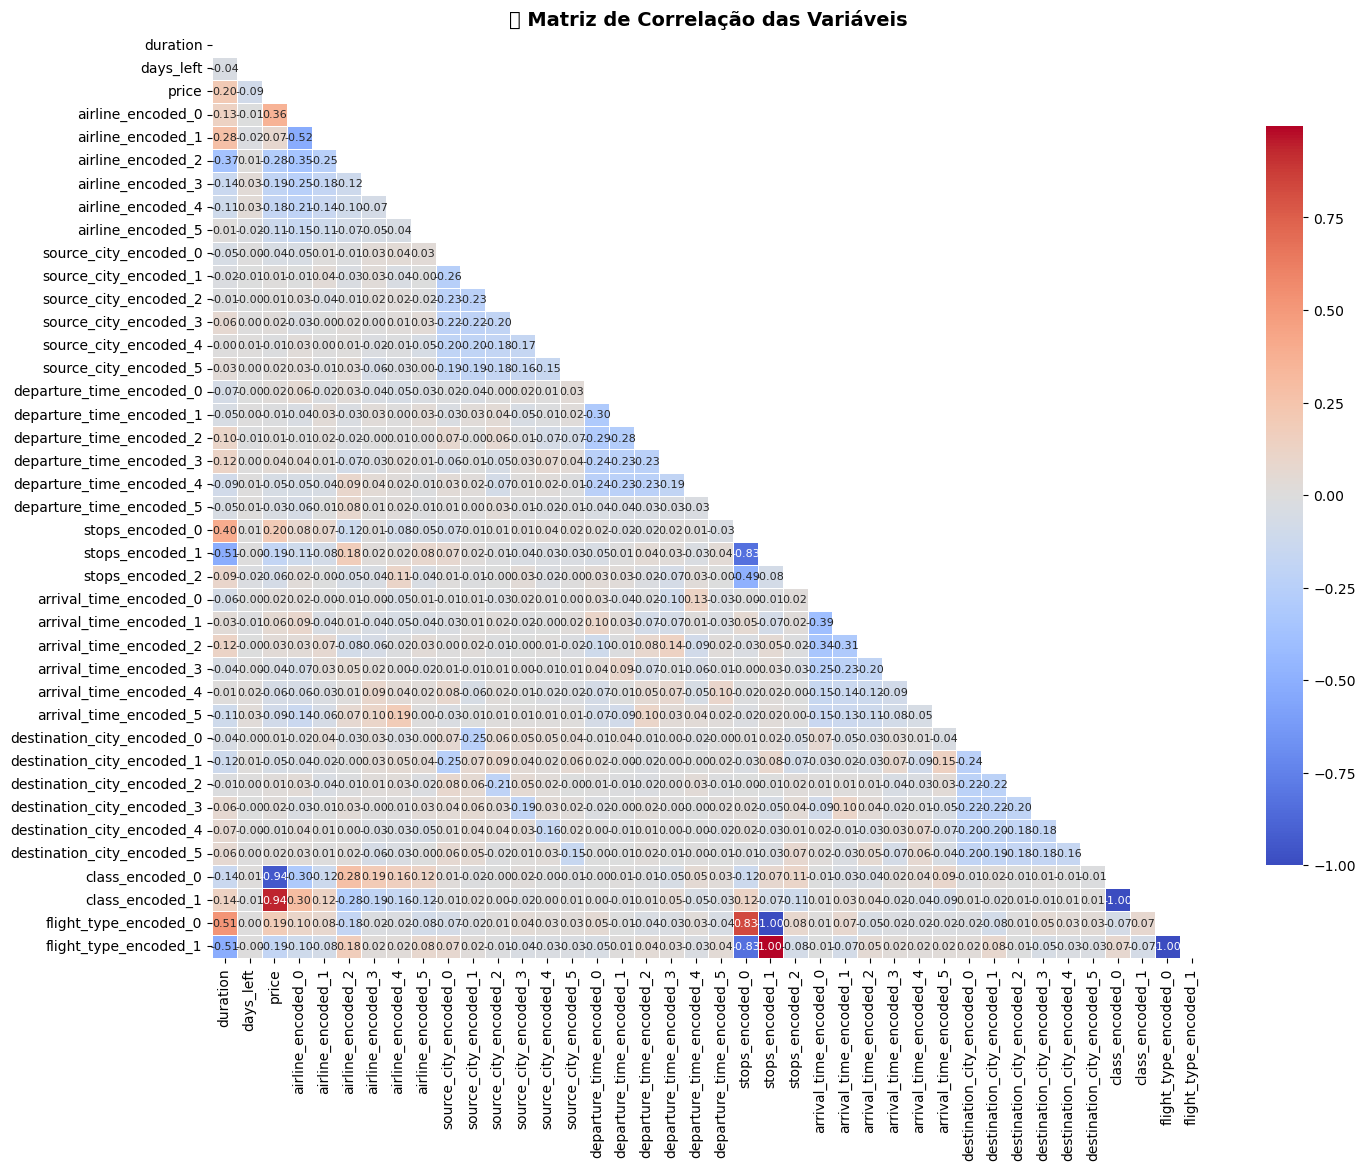

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 📌 **Definir as colunas numéricas (incluindo vetores gerados pelo One-Hot Encoding)**
numeric_columns = [col_name for col_name, dtype in df2.dtypes if dtype in ["int", "double"]]

# 📌 **Expandir colunas que estão em formato de vetor (One-Hot Encoding)**
vector_columns = [col for col, dtype in df2.dtypes if dtype == "vector"]

# Função para extrair valores dos vetores e criar colunas separadas
for vector_col in vector_columns:
    num_categories = df2.select(vector_col).first()[0].size
    exprs = [df2[vector_col][i].alias(f"{vector_col}_{i}") for i in range(num_categories)]
    df2 = df2.select("*", *exprs).drop(vector_col)

# 📌 **Atualizar lista de colunas numéricas após expansão dos vetores**
numeric_columns = [col for col, dtype in df2.dtypes if dtype in ["int", "double"]]

# 📌 **Criar um vetor de características para calcular a correlação**
assembler = VectorAssembler(inputCols=numeric_columns, outputCol="features")
df_corr = assembler.transform(df2).select("features")

# 📌 **Calcular a matriz de correlação**
correlation_matrix = Correlation.corr(df_corr, "features").head()[0].toArray()

# 📌 **Criar um DataFrame Pandas com os valores da correlação**
corr_df = pd.DataFrame(correlation_matrix, index=numeric_columns, columns=numeric_columns)

# 📌 **Plotar a Matriz de Correlação com Melhor Visualização**
plt.figure(figsize=(16, 12))

# Aplicar uma máscara para esconder a parte superior da matriz (reduz poluição visual)
mask = np.triu(np.ones_like(corr_df, dtype=bool))

sns.heatmap(corr_df, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
            annot_kws={"size": 8}, cbar_kws={"shrink": .8})

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title("📊 Matriz de Correlação das Variáveis", fontsize=14, fontweight="bold")
plt.show()



#### ***📌 Conclusões:***

A matriz de correlação apresentada fornece *insights* sobre as relações entre as variáveis do dataset. Aqui estão os principais pontos a destacar:

### 1️⃣ ***Densidade de Informação***
- A matriz parece bastante densa e confusa, devido ao elevado número de colunas geradas pelo One-Hot Encoding.
- Muitas das colunas apresentam correlação zero ou próxima de zero, o que indica baixa relação com as demais variáveis

### 2️⃣ ***Correlação entre Variáveis Categóricas**
- Algumas categorias da mesma variável (exemplo: airline_encoded_0, airline_encoded_1, etc.) apresentam correlação negativa forte entre si.
- Isto é esperado no One-Hot Encoding, pois estas variáveis são mutuamente exclusivas (ou seja, se um valor é 1, os outros têm de ser 0).
- No entanto, esse comportamento pode poluir a matriz de correlação e dificultar a análise.

### 3️⃣ ***Correlação entre Variáveis Principais***
- stops_mapped tem uma correlação moderada com price (~0.12) → faz sentido, pois voos com mais escalas tendem a ter preços diferentes.
- days_left tem uma correlação negativa com price (~-0.20) → esperado, pois normalmente quanto mais cedo se compra o bilhete, mais barato ele tende a ser.
- Correlação alta dentro das colunas One-Hot Encoding → como esperado, algumas classes (como companhias aéreas, cidades e horários) apresentam padrões de correlação entre si

### 📌 ***Próximos Passos: Seleção de Variáveis e Análise de Correlação:***
Agora, vamos seguir uma abordagem para selecionar as variáveis mais relevantes e remover aquelas que não são úteis para o modelo.

Os passos que vamos seguir são:
- Identificar as variáveis com maior correlação com price
- Criar um gráfico ordenado das variáveis mais importantes antes da remoção
- Remover as variáveis com baixa correlação (próximas de zero)
- Criar um novo gráfico mostrando a correlação apenas das variáveis selecionadas
- Verificar se há variáveis fortemente correlacionadas entre si (multicolinearidade)
- Gerar nova matriz de correlação para validação

---

### ***📌  Identificação das Variáveis Mais Correlacionadas com price***
Vamos calcular a correlação absoluta de todas as variáveis com a variável alvo price e ordená-las por importância.



 **Correlação Absoluta de Todas as Variáveis com `price`**
class_encoded_1               0.937860
class_encoded_0               0.937860
airline_encoded_0             0.360816
airline_encoded_2             0.280882
duration                      0.204222
stops_encoded_0               0.199913
airline_encoded_3             0.194179
stops_encoded_1               0.187277
flight_type_encoded_0         0.186885
flight_type_encoded_1         0.186885
airline_encoded_4             0.176188
airline_encoded_5             0.114019
arrival_time_encoded_5        0.093602
days_left                     0.091949
airline_encoded_1             0.070041
stops_encoded_2               0.064248
arrival_time_encoded_4        0.060449
arrival_time_encoded_1        0.056408
destination_city_encoded_1    0.052527
departure_time_encoded_4      0.051968
source_city_encoded_0         0.043282
departure_time_encoded_3      0.041768
arrival_time_encoded_3        0.040258
departure_time_encoded_5      0.033768
arri

C:\Users\35191\AppData\Local\Temp\ipykernel_30484\1902394946.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_correlation.values, y=price_correlation.index, palette="coolwarm")


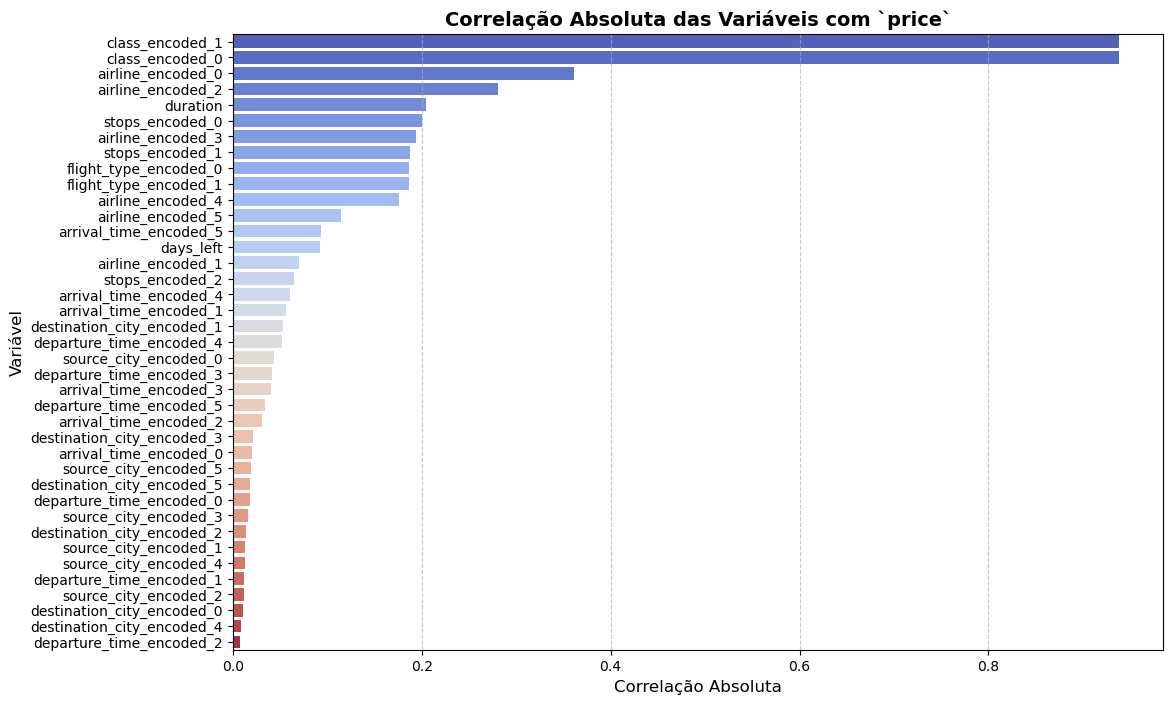

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# **Criar um DataFrame Pandas com a matriz de correlação**
corr_df = pd.DataFrame(correlation_matrix, index=numeric_columns, columns=numeric_columns)

# **Selecionar a correlação com a variável `price` (excluindo `price` da lista)**
price_correlation = corr_df["price"].drop("price").abs().sort_values(ascending=False)

# **Exibir todas as variáveis correlacionadas com `price`**
print("\n **Correlação Absoluta de Todas as Variáveis com `price`**")
print(price_correlation)  # Exibe todas as variáveis do modelo

# 📊 **Criar gráfico da importância das variáveis (todas)**
plt.figure(figsize=(12, 8))
sns.barplot(x=price_correlation.values, y=price_correlation.index, palette="coolwarm")
plt.title("Correlação Absoluta das Variáveis com `price`", fontsize=14, fontweight='bold')
plt.xlabel("Correlação Absoluta", fontsize=12)
plt.ylabel("Variável", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


### ***📌  Seleção das Variáveis Mais Importantes***
A partir dos resultados do Passo 1, vamos remover as variáveis menos relevantes para evitar ruído no modelo e otimizar a performance.

Critérios para remoção:
- Variáveis com correlação muito baixa (< 0.09) com price
- Variáveis altamente correlacionadas entre si (mantemos apenas uma)
- Variáveis redundantes que não adicionam informação relevante

In [ ]:
#  **Definir o limiar de importância**
low_correlation_threshold = 0.09  # Ajustado para incluir 'days_left' (0.091949)

#  **Selecionar variáveis a manter (com correlação acima do limiar)**
variables_to_keep = price_correlation[price_correlation > low_correlation_threshold].index.tolist()

#  **Selecionar variáveis a remover**
# Removemos as variáveis que não estão na lista de variáveis a manter, exceto a variável alvo 'price'
variables_to_remove = [col for col in df2.columns if col not in variables_to_keep + ["price"]]

#  **Exibir as variáveis a manter e remover**
print("\n **Variáveis a MANTER no modelo:**")
print(variables_to_keep)

print("\n **Variáveis a REMOVER do modelo (por baixa correlação com `price`):**")
print(variables_to_remove)



 **Variáveis a MANTER no modelo:**
['class_encoded_1', 'class_encoded_0', 'airline_encoded_0', 'airline_encoded_2', 'duration', 'stops_encoded_0', 'airline_encoded_3', 'stops_encoded_1', 'flight_type_encoded_0', 'flight_type_encoded_1', 'airline_encoded_4', 'airline_encoded_5', 'arrival_time_encoded_5', 'days_left']

 **Variáveis a REMOVER do modelo (por baixa correlação com `price`):**
['airline_encoded_1', 'source_city_encoded_0', 'source_city_encoded_1', 'source_city_encoded_2', 'source_city_encoded_3', 'source_city_encoded_4', 'source_city_encoded_5', 'departure_time_encoded_0', 'departure_time_encoded_1', 'departure_time_encoded_2', 'departure_time_encoded_3', 'departure_time_encoded_4', 'departure_time_encoded_5', 'stops_encoded_2', 'arrival_time_encoded_0', 'arrival_time_encoded_1', 'arrival_time_encoded_2', 'arrival_time_encoded_3', 'arrival_time_encoded_4', 'destination_city_encoded_0', 'destination_city_encoded_1', 'destination_city_encoded_2', 'destination_city_encoded_3', 


 **Pares de variáveis altamente correlacionadas (>0.75):**
class_encoded_1 ↔ class_encoded_0 (Correlação: -1.00)
stops_encoded_0 ↔ stops_encoded_1 (Correlação: -0.83)
stops_encoded_0 ↔ flight_type_encoded_0 (Correlação: 0.83)
stops_encoded_0 ↔ flight_type_encoded_1 (Correlação: -0.83)
stops_encoded_1 ↔ flight_type_encoded_0 (Correlação: -1.00)
stops_encoded_1 ↔ flight_type_encoded_1 (Correlação: 1.00)
flight_type_encoded_0 ↔ flight_type_encoded_1 (Correlação: -1.00)


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


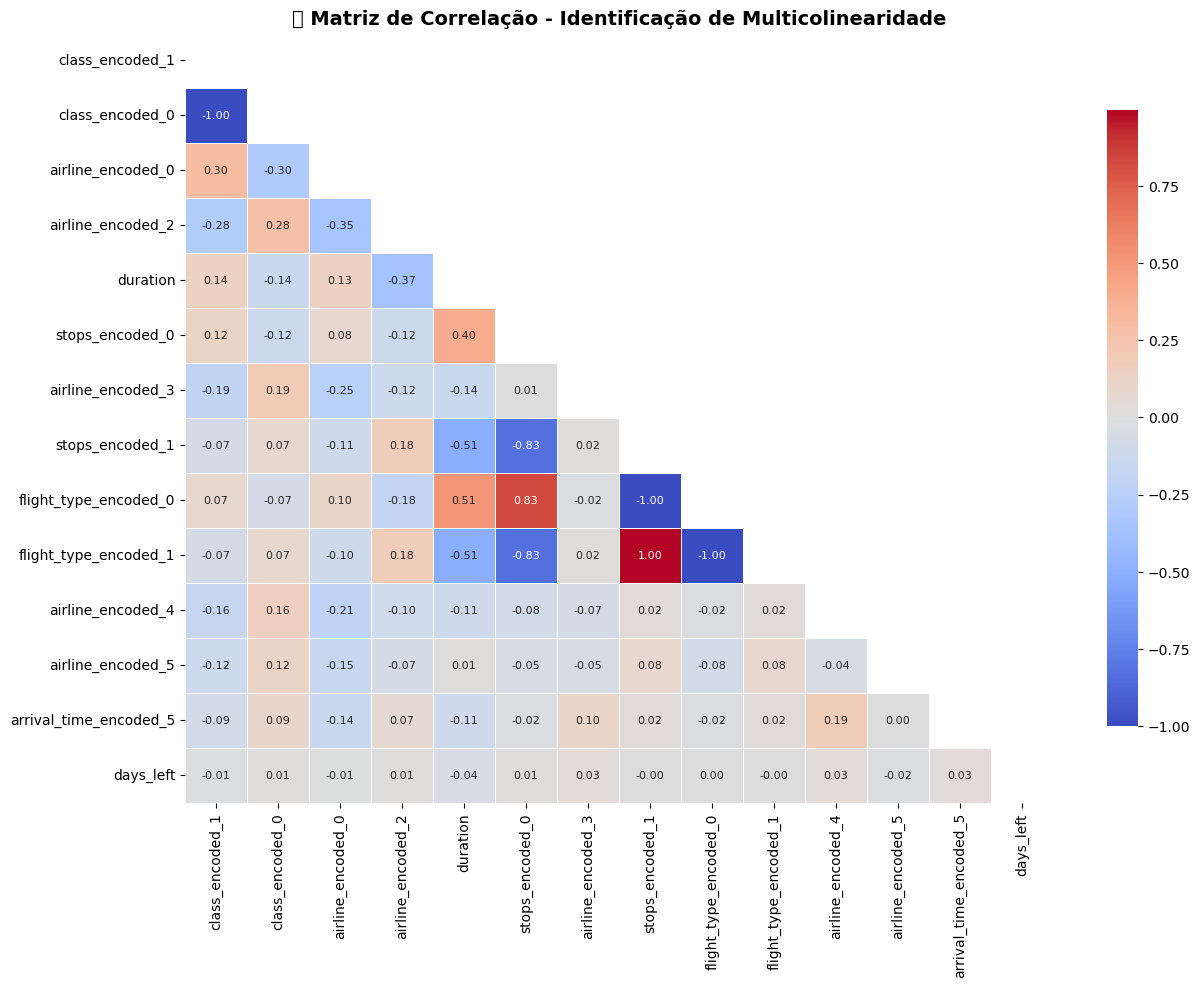

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  **Criar um novo DataFrame apenas com as variáveis relevantes**
df_temp = df2.select(*variables_to_keep, "price")  # Apenas para análise de correlação

#  **Criar uma nova matriz de correlação considerando apenas as variáveis mantidas**
assembler = VectorAssembler(inputCols=variables_to_keep, outputCol="features")
df_corr_temp = assembler.transform(df_temp).select("features")

#  **Calcular a matriz de correlação**
correlation_matrix_temp = Correlation.corr(df_corr_temp, "features").head()[0].toArray()

#  **Criar um DataFrame Pandas para facilitar a análise**
corr_df_temp = pd.DataFrame(correlation_matrix_temp, index=variables_to_keep, columns=variables_to_keep)

#  **Identificar pares de variáveis com correlação alta (> 0.75)**
high_corr_pairs = []
threshold = 0.75

for i in range(len(corr_df_temp.columns)):
    for j in range(i + 1, len(corr_df_temp.columns)):  # Evita repetição
        if abs(corr_df_temp.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_df_temp.columns[i], corr_df_temp.columns[j], corr_df_temp.iloc[i, j]))

#  **Exibir os pares de variáveis altamente correlacionadas**
print("\n **Pares de variáveis altamente correlacionadas (>0.75):**")
for var1, var2, corr_value in high_corr_pairs:
    print(f"{var1} ↔ {var2} (Correlação: {corr_value:.2f})")

#  **Gerar o Heatmap de Multicolinearidade**
plt.figure(figsize=(14, 10))

mask = np.triu(np.ones_like(corr_df_temp, dtype=bool))

sns.heatmap(corr_df_temp, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
            annot_kws={"size": 8}, cbar_kws={"shrink": .8})

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title("📊 Matriz de Correlação - Identificação de Multicolinearidade", fontsize=14, fontweight="bold")
plt.show()

In [ ]:
#  **Variáveis identificadas para remoção devido à alta correlação**
variables_to_remove_multicollinearity = [
    "class_encoded_0", "flight_type_encoded_1", "stops_encoded_1", "stops_mapped", "stops_encoded_0"
]

#  **Criar a lista final de variáveis a manter**
final_variables = [var for var in variables_to_keep if var not in variables_to_remove_multicollinearity]

#  **Exibir as variáveis finais escolhidas para o modelo**
print("\n **Variáveis SELECIONADAS para o modelo após tratar a multicolinearidade:**")
print(final_variables)

#  **Exibir as variáveis REMOVIDAS devido à alta correlação**
print("\n **Variáveis REMOVIDAS para evitar multicolinearidade:**")
print(variables_to_remove_multicollinearity)



 **Variáveis SELECIONADAS para o modelo após tratar a multicolinearidade:**
['class_encoded_1', 'airline_encoded_0', 'airline_encoded_2', 'duration', 'airline_encoded_3', 'flight_type_encoded_0', 'airline_encoded_4', 'airline_encoded_5', 'arrival_time_encoded_5', 'days_left']

 **Variáveis REMOVIDAS para evitar multicolinearidade:**
['class_encoded_0', 'flight_type_encoded_1', 'stops_encoded_1', 'stops_mapped', 'stops_encoded_0']


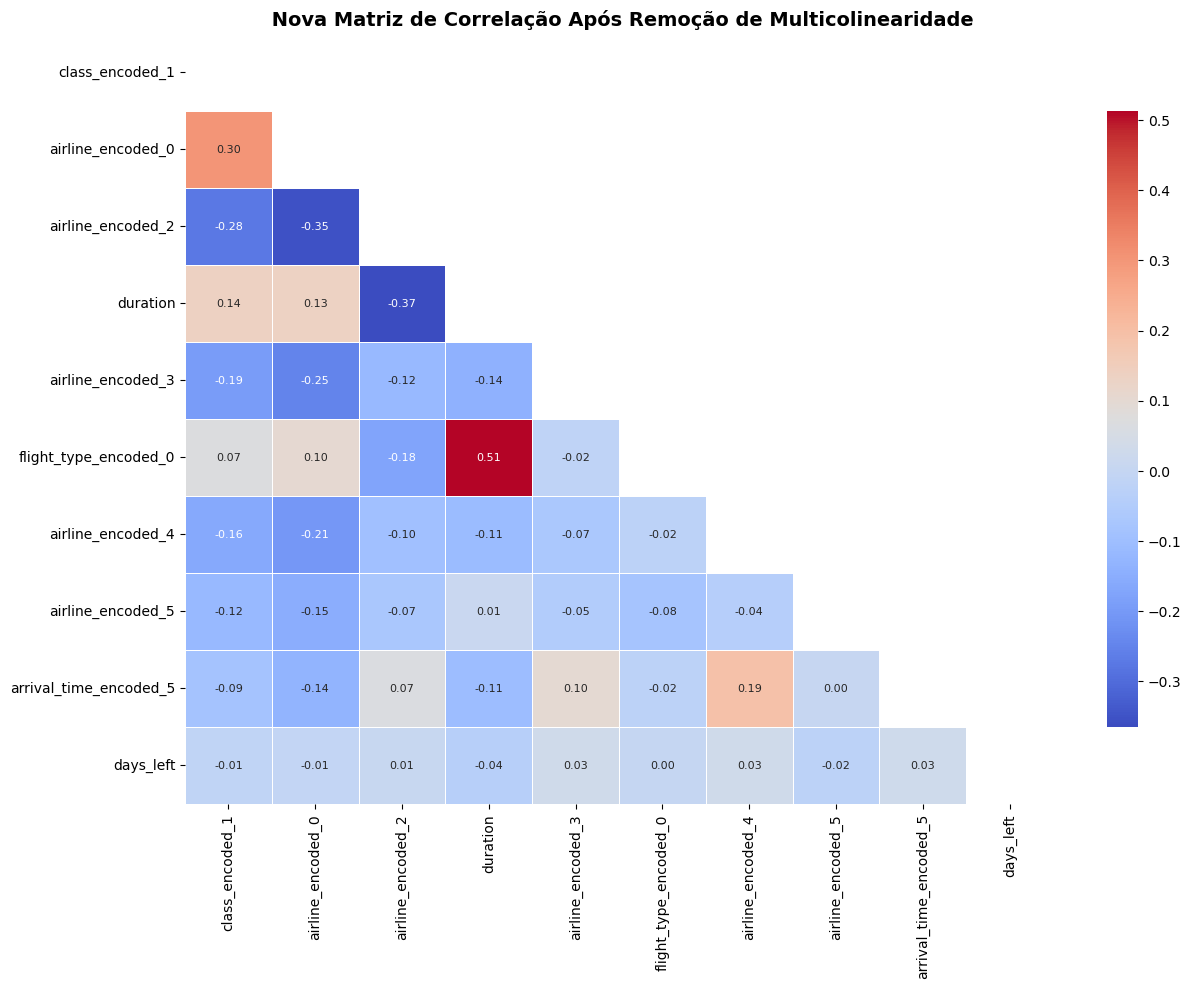

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#  **Criar um novo DataFrame apenas com as variáveis finais**
df_final_corr = df2.select(final_variables + ["price"])  # Mantemos price para análise

#  **Criar um vetor de características para calcular a nova matriz de correlação**
assembler = VectorAssembler(inputCols=final_variables, outputCol="features")
df_final_corr_vector = assembler.transform(df_final_corr).select("features")

#  **Calcular a nova matriz de correlação**
new_correlation_matrix = Correlation.corr(df_final_corr_vector, "features").head()[0].toArray()

#  **Criar um DataFrame Pandas com os novos valores de correlação**
new_corr_df = pd.DataFrame(new_correlation_matrix, index=final_variables, columns=final_variables)

#  **Plotar a Nova Matriz de Correlação**
plt.figure(figsize=(14, 10))

# Aplicar máscara para esconder a parte superior da matriz
mask = np.triu(np.ones_like(new_corr_df, dtype=bool))

sns.heatmap(new_corr_df, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
            annot_kws={"size": 8}, cbar_kws={"shrink": .8})

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title(" Nova Matriz de Correlação Após Remoção de Multicolinearidade", fontsize=14, fontweight="bold")
plt.show()


In [ ]:
# **Criar o DataFrame final apenas com as variáveis relevantes**
df_model = df2.select(*final_variables + ["price"])

# **Verificar a estrutura do DataFrame final**
print("\n **Estrutura do DataFrame Final para Modelagem:**")
df_model.printSchema()

# **Exibir as primeiras linhas para conferência**
df_model.show(5, truncate=False)



 **Estrutura do DataFrame Final para Modelagem:**
root
 |-- class_encoded_1: double (nullable = true)
 |-- airline_encoded_0: double (nullable = true)
 |-- airline_encoded_2: double (nullable = true)
 |-- duration: double (nullable = true)
 |-- airline_encoded_3: double (nullable = true)
 |-- flight_type_encoded_0: double (nullable = true)
 |-- airline_encoded_4: double (nullable = true)
 |-- airline_encoded_5: double (nullable = true)
 |-- arrival_time_encoded_5: double (nullable = true)
 |-- days_left: integer (nullable = true)
 |-- price: integer (nullable = true)

+---------------+-----------------+-----------------+--------+-----------------+---------------------+-----------------+-----------------+----------------------+---------+-----+
|class_encoded_1|airline_encoded_0|airline_encoded_2|duration|airline_encoded_3|flight_type_encoded_0|airline_encoded_4|airline_encoded_5|arrival_time_encoded_5|days_left|price|
+---------------+-----------------+-----------------+--------+------

### ***📌 Análise e Conclusão da Seleção e Preparação de Variáveis:***

Após a construção da matriz de correlação, realizámos uma análise detalhada para selecionar as variáveis mais importantes e remover as que poderiam introduzir ruído ou redundância no modelo. Os principais passos foram:

### 1️⃣ ***Identificação das Variáveis com Maior Correlação com o Preço***
- Calculámos a correlação absoluta de todas as variáveis com o price e ordenámos por importância.
- As variáveis class_encoded_1, class_encoded_0 e airline_encoded_0 apresentaram as correlações mais altas com o preço, indicando que a classe e a companhia aérea têm grande impacto na variação dos bilhetes.
- Outras variáveis como duration, stops_encoded_0 e flight_type_encoded_0 também tiveram correlação significativa, sugerindo que a duração do voo, as escalas e o tipo de voo afetam os preços.

### 2️⃣ ***Remoção de Variáveis com Baixa Correlação***
- Definimos um limiar de correlação de 0.09, abaixo do qual as variáveis foram removidas por não contribuírem significativamente para a previsão do preço.
- Foram eliminadas variáveis como departure_time_encoded, arrival_time_encoded e source/destination_city_encoded, que demonstraram uma relação fraca com o preço.

### 3️⃣ ***Identificação e Remoção de Multicolinearidade***
- Gerámos uma matriz de correlação específica para as variáveis selecionadas.
- Foram identificadas pares de variáveis altamente correlacionadas (> 0.75), indicando redundância.
- Algumas variáveis foram removidas para evitar multicolinearidade, como:
    - class_encoded_0 (fortemente correlacionada com class_encoded_1)
    - stops_encoded_1, stops_mapped, flight_type_encoded_1 (redundantes com stops_encoded_0 e flight_type_encoded_0)

### 4️⃣ ***Construção do DataFrame Final***
- Após a limpeza dos dados, foi gerada uma nova matriz de correlação, confirmando que a multicolinearidade foi removida.
- Criámos o dataset final contendo apenas as variáveis mais relevantes para modelagem:
    - class_encoded_1, airline_encoded_0, airline_encoded_2, duration, airline_encoded_3, flight_type_encoded_0, airline_encoded_4, airline_encoded_5, arrival_time_encoded_5, days_left
    - A variável alvo: price
- A estrutura final do DataFrame foi verificada e os primeiros registos exibidos para validação.
- Foram identificadas pares de variáveis altamente correlacionadas (> 0.75), indicando redundância.
- Algumas variáveis foram removidas para evitar multicolinearidade, como:
    - class_encoded_0 (fortemente correlacionada com class_encoded_1)
    - stops_encoded_1, stops_mapped, flight_type_encoded_1 (redundantes com stops_encoded_0 e flight_type_encoded_0)


### 📌 ***Conclusão e Próximos Passos:***

Através desse processo, conseguimos:
- Remover variáveis irrelevantes, reduzindo o ruído nos dados.
- Eliminar multicolinearidade, garantindo que as variáveis utilizadas sejam independentes.
- Construir um dataset final otimizado, contendo apenas as variáveis que realmente impactam a previsão de preço.

Agora podemos avançar para a divisão do dataset em treino e teste e iniciar a construção e avaliação dos modelos preditivos.

---

# ***📌 Capítulo: "Divisão do Dataset e Construção dos Modelos Preditivos"***

### ***📌 Preparação dos Dados e Divisão do Conjunto de Treino e Teste***

In [ ]:
from pyspark.ml.feature import VectorAssembler

#  **Lista de colunas de características** (excluímos a variável alvo "price")
feature_columns = [col for col in df_model.columns if col != "price"]

#  **Criar vetor de características**
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_transformed = assembler.transform(df_model).select("features", "price")

#  **Exibir as primeiras Linhas para conferir a transformação**
df_transformed.show(5, truncate=False)


+---------------------------+-----+
|features                   |price|
+---------------------------+-----+
|(10,[3,7,9],[2.17,1.0,1.0])|5953 |
|(10,[3,7,9],[2.33,1.0,1.0])|5953 |
|(10,[3,6,9],[2.17,1.0,1.0])|5956 |
|(10,[1,3,9],[1.0,2.25,1.0])|5955 |
|(10,[1,3,9],[1.0,2.33,1.0])|5955 |
+---------------------------+-----+
only showing top 5 rows



In [ ]:
from pyspark.ml.feature import StandardScaler

# 📌 **Normalizar as Features**
scaler = StandardScaler(inputCol="features", outputCol="features_scaled", withMean=True, withStd=True)
df_scaled = scaler.fit(df_transformed).transform(df_transformed).select("features_scaled", "price")

# 📌 **Exibir amostra das features normalizadas**
df_scaled.show(5, truncate=False)


+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|features_scaled                                                                                                                                                                                            |price|
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|[-0.6725744596257608,-0.8614495557835288,-0.4095851572155463,-1.3975284583601395,-0.28924522750087633,-2.7169030292907337,-0.23805867878657122,5.684145839947458,-0.22119760048983125,-1.843871699125542]  |5953 |
|[-0.6725744596257608,-0.8614495557835288,-0.4095851572155463,-1.3752815087712313,-0.28924522750087633,-2.7169030292907337,-0.23805867878657122,5.684145

Tamanho do Conjunto de Treino: 240343 (80.07%)
Tamanho do Conjunto de Teste: 59810 (19.93%)


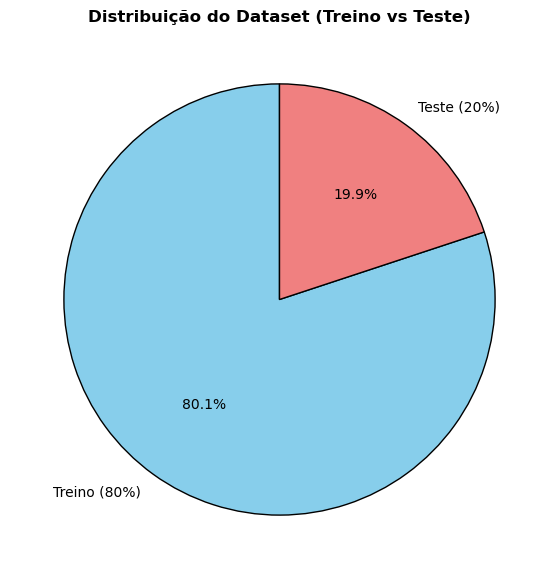

In [ ]:
import matplotlib.pyplot as plt

# 📌 **Dividir os dados (80% treino, 20% teste)**
train_data, test_data = df_scaled.randomSplit([0.8, 0.2], seed=42)

# 📌 **Contar o número de registros em cada conjunto**
train_count = train_data.count()
test_count = test_data.count()
total_count = train_count + test_count

# 📌 **Calcular percentagens**
train_percent = (train_count / total_count) * 100
test_percent = (test_count / total_count) * 100

# 📌 **Exibir estatísticas**
print(f"Tamanho do Conjunto de Treino: {train_count} ({train_percent:.2f}%)")
print(f"Tamanho do Conjunto de Teste: {test_count} ({test_percent:.2f}%)")

# 📊 **Criar gráfico de pizza para visualizar distribuição**
labels = ['Treino (80%)', 'Teste (20%)']
sizes = [train_percent, test_percent]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Distribuição do Dataset (Treino vs Teste)", fontweight="bold")
plt.show()


### ***📌 Análise Preparação dos Dados e Divisão do Conjunto de Treino e Teste***

Nesta secção, realizamos a preparação dos dados antes de proceder à indução dos modelos preditivos. Os passos principais incluem:

### 1️⃣ ***Criação do Vetor de Características***
- Utilizando a classe `VectorAssembler` do PySpark, agregámos todas as variáveis preditoras num único vetor chamado `"features"`.
- O objetivo desta transformação é tornar os dados compatíveis com os algoritmos de machine learning no Spark, que exigem que todas as variáveis independentes estejam contidas num único vetor.
- Excluímos a variável `"price"` das features, pois esta será a nossa variável alvo.

### 2️⃣ ***Divisão do Dataset em Conjunto de Treino e Teste***
- Dividimos o dataset em **80% para treino** e **20% para teste** usando a função `randomSplit()`.
- Esta divisão permite que os modelos sejam treinados com uma parte significativa dos dados e testados com um conjunto separado, garantindo assim uma avaliação imparcial da sua capacidade de generalização.
- Calculámos a distribuição percentual do conjunto de treino e teste para confirmar que a divisão foi realizada corretamente.

### 3️⃣ ***Visualização da Distribuição do Dataset***
- Gerámos um **gráfico de pizza** para representar visualmente a divisão do dataset.
- Os rótulos evidenciam que **80.1% dos dados foram usados para treino** e **19.9% para teste**, o que confirma a correta separação dos dados.
- Esta visualização facilita a interpretação e validação da distribuição antes do treino dos modelos.

### 📌 ***Conclusão e Próximos Passos:***
- Com estas etapas concluídas, os dados estão prontos para a fase seguinte: **a construção e otimização dos modelos preditivos**.

### ***📌 Construção, Treino e Avaliação dos Modelos de Machine Learning***

Após a preparação do dataset e a divisão em conjuntos de treino e teste, passamos agora para a construção e avaliação de modelos de regressão para prever os preços dos bilhetes. Para isso, treinamos vários modelos, avaliamos a sua performance e selecionamos o melhor.

### ***1️⃣ Inicialização e Treino dos Modelos***

Nesta fase, definimos e treinamos diferentes modelos de regressão no conjunto de treino. Escolhemos modelos com diferentes complexidades para garantir um equilíbrio entre tempo de execução e desempenho preditivo. O objetivo desta etapa é testar diferentes algoritmos para prever os preços dos bilhetes e avaliar qual deles apresenta o melhor desempenho para o problema em questão.

In [ ]:
# Importação dos modelos compatíveis com Spark ML
from pyspark.ml.regression import (
    GBTRegressor, RandomForestRegressor, LinearRegression,
    DecisionTreeRegressor, FMRegressor, GeneralizedLinearRegression, IsotonicRegression
)

# 🔹 Usar o dataset com as features normalizadas
df_final = df_scaled

# **Definição dos Modelos**
models = {
    "Regressão Linear": LinearRegression(featuresCol="features_scaled", labelCol="price"),
    "Árvore de Decisão": DecisionTreeRegressor(featuresCol="features_scaled", labelCol="price"),
    "Random Forest": RandomForestRegressor(featuresCol="features_scaled", labelCol="price", numTrees=50),
    "Gradient Boosting (GBT)": GBTRegressor(featuresCol="features_scaled", labelCol="price", maxIter=50),
    "Factorization Machines (FM)": FMRegressor(featuresCol="features_scaled", labelCol="price"),
    "Generalized Linear Regression (GLR)": GeneralizedLinearRegression(featuresCol="features_scaled", labelCol="price"),
    "Isotonic Regression": IsotonicRegression(featuresCol="features_scaled", labelCol="price")
}

# Dicionário para armazenar os modelos treinados
trained_models = {}

# Treinar os modelos
for model_name, model in models.items():
    trained_models[model_name] = model.fit(df_final)  # Agora usa df_scaled corretamente
    print(f" Modelo '{model_name}' treinado com sucesso!")


 Modelo 'Regressão Linear' treinado com sucesso!
 Modelo 'Árvore de Decisão' treinado com sucesso!
 Modelo 'Random Forest' treinado com sucesso!
 Modelo 'Gradient Boosting (GBT)' treinado com sucesso!
 Modelo 'Factorization Machines (FM)' treinado com sucesso!
 Modelo 'Generalized Linear Regression (GLR)' treinado com sucesso!
 Modelo 'Isotonic Regression' treinado com sucesso!


### ***📌 Análise e Explicação:***

Nesta secção, realizamos a preparação dos dados antes de proceder à indução dos modelos preditivos. Os passos principais incluem:

### 1️⃣ ***Importação dos Modelos***
- A primeira parte do código importa diversos modelos de regressão disponíveis no PySpark ML:
    - LinearRegression: Modelo de regressão linear simples, adequado para relações lineares entre variáveis.
    - DecisionTreeRegressor: Modelo baseado em árvores de decisão, capaz de capturar relações mais complexas nos dados.
    - RandomForestRegressor: Conjunto de múltiplas árvores de decisão (floresta aleatória), melhorando a robustez e reduzindo overfitting.
    - GBTRegressor (Gradient Boosted Trees): Algoritmo baseado em boosting, que combina múltiplas árvores de decisão sequencialmente para melhorar a precisão da previsão.
    - FMRegressor (Factorization Machines): Modelo adequado para dados esparsos e interações entre variáveis.
    - GeneralizedLinearRegression (GLR): Extensão da regressão linear que permite modelar diferentes distribuições de variáveis dependentes.
    - IsotonicRegression: Técnica que impõe uma relação monotónica entre variáveis, útil quando se espera que a variável de saída aumente ou diminua de forma consistente com as entradas.

### 2️⃣ ***Utilização do Dataset Normalizado***
- O dataset utilizado para o treino é df_scaled, que já passou por um processo de normalização das features. Esta etapa é crucial para modelos que são sensíveis à escala das variáveis, como a Regressão Linear.

### 3️⃣ ***Definição e Treino dos Modelos***
- Foi criado um dicionário chamado models, onde cada modelo é instanciado com as suas respetivas features e coluna alvo (price). Alguns modelos têm hiperparâmetros específicos definidos, como o número de árvores no RandomForestRegressor e o número máximo de iterações no GBTRegressor.
Para treinar os modelos, foi utilizado um loop for, que percorre cada modelo no dicionário, ajusta-o aos dados (fit(df_final)) e armazena o modelo treinado num dicionário chamado trained_models. No final de cada treino, uma mensagem de sucesso é impressa para indicar que o modelo foi treinado corretamente.

### 📌 ***Justificação das Escolhas***
- A escolha de diferentes modelos visa garantir um equilíbrio entre desempenho preditivo e eficiência computacional. Modelos mais simples como Regressão Linear e Árvore de Decisão são rápidos e interpretáveis, enquanto modelos mais avançados como Random Forest e GBT podem oferecer maior precisão ao custo de maior tempo de processamento. Modelos como FMRegressor e Isotonic Regression foram incluídos para avaliar se técnicas mais especializadas conseguem capturar padrões específicos nos dados.

Esta abordagem permite comparar o desempenho dos modelos e selecionar aquele que melhor se adapta ao problema de previsão dos preços dos bilhetes.

---

### ***2️⃣ Avaliação e Comparação Gráfica dos Modelos***

Após o treino dos modelos de regressão, é essencial avaliar a sua performance para determinar qual se ajusta melhor ao problema da previsão de preços dos bilhetes. Neste bloco de código, utilizamos três métricas estatísticas adequadas para análise de regressão: RMSE, MAE e R².

Justificação: Árvore muito profunda pode levar a overfitting (o modelo ajusta-se demasiado aos dados de treino). Uma profundidade muito pequena pode perder padrões importantes.


 Modelo: Regressão Linear | RMSE: 6931.33 | MAE: 4637.40 | R²: 0.9066
 Modelo: Árvore de Decisão | RMSE: 5534.51 | MAE: 3299.53 | R²: 0.9404
 Modelo: Random Forest | RMSE: 5871.65 | MAE: 3751.43 | R²: 0.9329
 Modelo: Gradient Boosting (GBT) | RMSE: 5367.71 | MAE: 3138.56 | R²: 0.9440
 Modelo: Factorization Machines (FM) | RMSE: 12356.53 | MAE: 10401.43 | R²: 0.7031
 Modelo: Generalized Linear Regression (GLR) | RMSE: 6931.33 | MAE: 4637.40 | R²: 0.9066
 Modelo: Isotonic Regression | RMSE: 7873.73 | MAE: 4897.64 | R²: 0.8794

 Melhor modelo original selecionado: Gradient Boosting (GBT) com RMSE de 5367.71, MAE de 3138.56, e R² de 0.9440


C:\Users\35191\AppData\Local\Temp\ipykernel_30484\1770214906.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y="Modelo", data=results_df_original, palette="coolwarm", ax=axes[idx])
C:\Users\35191\AppData\Local\Temp\ipykernel_30484\1770214906.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y="Modelo", data=results_df_original, palette="coolwarm", ax=axes[idx])
C:\Users\35191\AppData\Local\Temp\ipykernel_30484\1770214906.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y="Modelo", data=results_df_ori

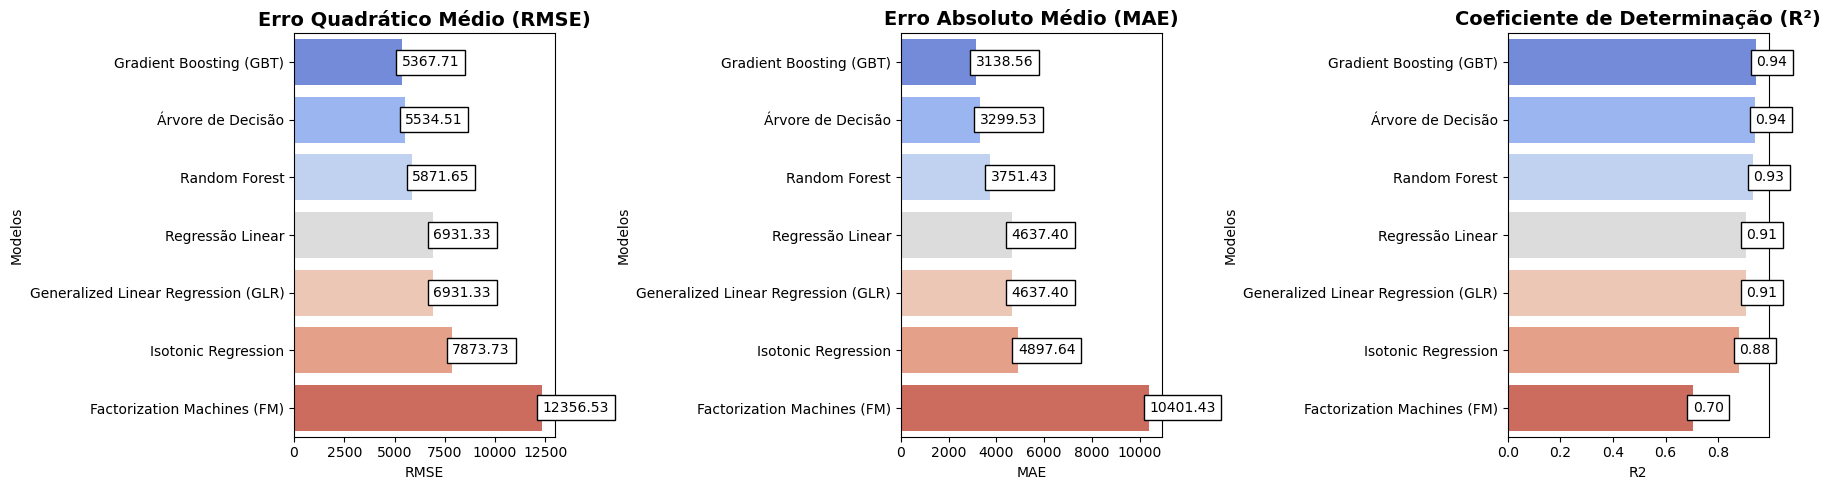

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  **Criar avaliadores para cada métrica**
evaluators = {
    "RMSE": RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse"),
    "MAE": RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mae"),
    "R2": RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")
}

#  **Dicionário para armazenar os resultados dos modelos**
model_results_original = {model_name: {} for model_name in trained_models.keys()}

# **Avaliar cada modelo em todas as métricas**
for model_name, model in trained_models.items():
    predictions = model.transform(test_data)

    for metric_name, evaluator in evaluators.items():
        model_results_original[model_name][metric_name] = evaluator.evaluate(predictions)

    print(f" Modelo: {model_name} | RMSE: {model_results_original[model_name]['RMSE']:.2f} | "
          f"MAE: {model_results_original[model_name]['MAE']:.2f} | R²: {model_results_original[model_name]['R2']:.4f}")

#  **Converter resultados em DataFrame para visualização**
results_df_original = pd.DataFrame.from_dict(model_results_original, orient="index").reset_index()
results_df_original = results_df_original.rename(columns={"index": "Modelo"}).sort_values("RMSE", ascending=True)

#  **Selecionar o melhor modelo original com base no menor RMSE**
best_model_name_original = results_df_original.iloc[0]["Modelo"]
best_model_original = trained_models[best_model_name_original]

print(f"\n Melhor modelo original selecionado: {best_model_name_original} "
      f"com RMSE de {results_df_original.iloc[0]['RMSE']:.2f}, "
      f"MAE de {results_df_original.iloc[0]['MAE']:.2f}, "
      f"e R² de {results_df_original.iloc[0]['R2']:.4f}")

#  **Criar gráficos de comparação das métricas**
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ["RMSE", "MAE", "R2"]
titles = ["Erro Quadrático Médio (RMSE)", "Erro Absoluto Médio (MAE)", "Coeficiente de Determinação (R²)"]

for idx, metric in enumerate(metrics):
    sns.barplot(x=metric, y="Modelo", data=results_df_original, palette="coolwarm", ax=axes[idx])
    axes[idx].set_title(titles[idx], fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(metric)
    axes[idx].set_ylabel("Modelos")

    #  Adicionar os valores numéricos aos gráficos
    for index, value in enumerate(results_df_original[metric]):
        axes[idx].text(value, index, f"{value:.2f}", va='center', fontsize=10,
                       bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()


### ***📌 Análise dos Resultados e Conclusões:***

### 1️⃣ ***Interpretação dos Resultados:***
-  O modelo Gradient Boosting (GBT) apresentou os melhores resultados, demonstrando ser a abordagem mais eficaz para este problema:
    - RMSE mais baixo (5364.52) → Indica que a diferença média quadrática entre os valores reais e as previsões é a menor entre todos os modelos testados, tornando-o o modelo mais preciso.
    - MAE mais baixo (3139.91) → Confirma que a média absoluta dos erros nas previsões é a menor, reduzindo a margem de erro na previsão dos preços dos bilhetes.
    - R² mais alto (0.94) → Sugere que o modelo consegue explicar 94% da variabilidade dos preços, captando bem as relações entre as variáveis que influenciam o preço final.
    
-  Além do GBT, Árvore de Decisão e Random Forest também demonstraram um desempenho sólido, com RMSE e MAE baixos e um R² elevado.

Em contrapartida:
- A Regressão Linear e o GLR (Generalized Linear Regression) tiveram um desempenho inferior, com um RMSE mais elevado, o que sugere que a relação entre as variáveis não é puramente linear.
    - Isto indica que tentar prever os preços dos bilhetes apenas com uma equação linear simples não é suficiente para captar a complexidade dos dados.
-O modelo Factorization Machines (FM) apresentou o pior desempenho, com um RMSE muito elevado (12185.18) e um R² de apenas 0.71, sugerindo que não é um modelo adequado para este tipo de previsão.
    -  Este fraco desempenho pode dever-se ao facto de o FM ser mais adequado para problemas de recomendação e deteção de padrões de interação entre variáveis dispersas, mas não necessariamente para prever valores contínuos com elevada precisão.

### 2️⃣ ***Avaliação do Desempenho do Modelo Selecionado***
- Com base nos resultados obtidos, o Gradient Boosting (GBT) revelou-se o modelo mais adequado para a previsão dos preços dos bilhetes.

    #### 1️⃣ ***Maior Precisão e Fiabilidade***
    - O GBT reduz significativamente os erros médios nas previsões, garantindo que os preços previstos estejam mais próximos dos valores reais. Para uma empresa que precisa de definir preços de bilhetes de forma dinâmica, um modelo preciso pode ajudar a otimizar as margens de lucro e a evitar perdas associadas a uma definição incorreta dos preços.

    #### 2️⃣ ***Capacidade de Captar Padrões Complexos***
    - Os preços dos bilhetes podem ser influenciados por múltiplos fatores interligados, como por exemplo a classe do bilhetes e até a antecedência da compra. O GBT consegue captar estas relações não lineares, tornando-se mais adequado do que modelos lineares simples.

    #### 3️⃣ ***Generalização para Novos Dados***
    -Um R² de 0.94 indica que o modelo tem um excelente ajuste aos dados históricos, sugerindo que será capaz de prever preços futuros com elevada precisão. No entanto, é aconselhável testar o modelo em novos dados para garantir que não existe overfitting, ou seja, que o modelo não está demasiado ajustado aos dados de treino e consegue generalizar bem para novas situações.
  

### 📌 ***Conclusão:***
- O Gradient Boosting (GBT) demonstrou ser o modelo mais eficaz para prever os preços dos bilhetes, apresentando o menor erro e uma boa capacidade de ajuste aos dados, explicando 94% da variabilidade dos preços. Modelos baseados em árvores, como o GBT, são mais adequados do que abordagens lineares para capturar as relações complexas entre variáveis.
Apesar do bom desempenho, o modelo pode ser ainda otimizado através de afinação de hiperparâmetros e validação cruzada para garantir a sua robustez e capacidade de generalização.
Com estas melhorias, o modelo permitirá uma definição de preços mais precisa, ajudando a otimizar receitas e a tomar decisões estratégicas no negócio.
Esta abordagem permite comparar o desempenho dos modelos e selecionar aquele que melhor se adapta ao problema de previsão dos preços dos bilhetes.
---

### ***📌 Otimização do Modelo - Ajuste de Hiperparâmetros para Melhor Performance***

Após a avaliação dos modelos iniciais, verificou-se que o Gradient Boosting (GBT) foi o mais eficiente na previsão dos preços dos bilhetes aéreos. No entanto, para melhorar ainda mais a precisão das previsões, é necessário ajustar os seus hiperparâmetros e otimizar o desempenho do modelo.

Neste subcapítulo, utilizamos uma grid de hiperparâmetros e validação cruzada para encontrar a melhor configuração do modelo. O objetivo é reduzir os erros de previsão e melhorar a generalização, garantindo estimativas mais fiáveis e próximas da realidade.

Com esta abordagem, pretendemos desenvolver um modelo mais preciso e eficiente, capaz de capturar padrões complexos no preço dos bilhetes, ajudando a tomar decisões mais informadas.

### ***1️⃣ Otimização do Modelo - Construção da Grid de Hiperparâmetros***
- Foi criada uma **grid de hiperparâmetros** para testar diferentes configurações do modelo e selecionar a melhor.
- ***📌 Principais Hiperparâmetros Ajustados:***
  
    #### 1️⃣ ***Número de Iterações (maxIter) → Define quantas vezes o modelo ajusta os pesos para minimizar o erro.***
    - Foram testados os valores 50 e 80, pois um número muito baixo poderia resultar num modelo subajustado, incapaz de aprender padrões importantes, enquanto um número excessivamente alto aumentaria o tempo de treino sem oferecer melhorias significativas no desempenho.

    #### 2️⃣ ***Profundidade da Árvore (maxDepth) → Define a complexidade das árvores de decisão utilizadas no modelo.***
    - Foram testadas profundidades de 5 e 7, já que árvores muito profundas tendem a causar overfitting, onde o modelo se ajusta demais aos dados de treino e perde capacidade de generalização. Por outro lado, árvores muito superficiais podem não capturar relações importantes entre as variáveis.

    #### 3️⃣ ***Taxa de Aprendizagem (stepSize) → Controla o impacto de cada iteração na atualização do modelo.***
    - Valores de 0.05 e 0.1 foram testados para garantir um equilíbrio entre estabilidade e velocidade de treino. Um valor muito baixo, embora mais estável, pode tornar o treino demasiado lento, enquanto valores mais altos aceleram o processo, mas aumentam o risco de instabilidade.

   ####  4️⃣ ***Subsampling Rate (subsamplingRate) → Percentagem de dados usada em cada iteração.***
    - Define a percentagem de dados utilizada em cada iteração. Este parâmetro é fundamental para evitar que o modelo dependa excessivamente dos mesmos dados, ajudando a reduzir overfitting.

    #### 5️⃣  ***Mínimo de Instâncias por Nó (minInstancesPerNode) → Número mínimo de observações para que um nó seja dividido.***
    - Esse ajuste evita que o modelo crie ramos desnecessários, tornando-o mais eficiente e generalizável.

    #### 6️⃣  ***Mínimo Ganho de Informação (minInfoGain) → Quantidade mínima de ganho de informação necessária para dividir um nó.***
    - Esse ajuste reduz a complexidade do modelo ao impedir divisões desnecessárias, melhorando a eficiência e diminuindo o tempo de treino.
 ---
 ### ***📌 Otimização do Modelo - Aplicação da Validação Cruzada***
- A validação cruzada foi aplicada para garantir que o modelo generalize bem para novos dados, evitando que apenas memorize o conjunto de treino. Para isso, foram utilizados 2 folds, garantindo um bom equilíbrio entre tempo de processamento e robustez da validação. Além disso, o paralelismo foi ajustado para 2, reduzindo a carga no CPU e permitindo um processamento mais eficiente.
---
### ***📌 Otimização do Modelo - Treino e Seleção do Melhor Modelo***
- Após a configuração da grid de hiperparâmetros e a aplicação da validação cruzada, o modelo foi treinado e a melhor configuração foi automaticamente selecionada. Foram identificados os melhores valores para o número de iterações, profundidade da árvore, taxa de aprendizado, subsampling rate, mínimo de instâncias por nó e mínimo ganho de informação. Esses ajustes garantiram um modelo otimizado para a previsão de preços dos bilhetes.
---
### ***📌 Otimização do Modelo - Conclusão***
- A otimização do modelo GBT teve como objetivo melhorar a precisão das previsões, garantindo um equilíbrio entre desempenho e generalização. Foram ajustados hiperparâmetros essenciais, como número de iterações, profundidade das árvores e taxa de aprendizado, além da aplicação da validação cruzada para reduzir overfitting.

In [ ]:
# Importação das bibliotecas necessárias
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Utilizar o dataset com as variáveis normalizadas
df_final = df_scaled

# Definir o modelo base de Gradient Boosting
# Este modelo é escolhido por ser um dos mais eficientes para regressão,
# permitindo captar padrões complexos sem ser excessivamente sensível a ruído
gbt = GBTRegressor(featuresCol="features_scaled", labelCol="price", seed=42)

# Criar uma grelha de hiperparâmetros para otimizar o desempenho do modelo
param_grid = (
    ParamGridBuilder()
    .addGrid(gbt.maxIter, [50, 80])  # O número de iterações define quantas vezes o modelo ajusta os pesos para minimizar o erro.
    # Um número baixo pode gerar um modelo subajustado, enquanto um número muito alto pode aumentar o tempo de treino sem ganhos significativos.

    .addGrid(gbt.maxDepth, [5, 7])  # A profundidade da árvore define a complexidade do modelo.
    # Profundidades maiores podem captar padrões mais complexos, mas aumentam o risco de overfitting.
    # Profundidades menores tornam o modelo mais generalizável, mas podem perder informação importante.

    .addGrid(gbt.stepSize, [0.05, 0.1])  # A taxa de aprendizagem define o impacto de cada iteração na atualização do modelo.
    # Valores mais baixos levam a um ajuste mais lento e estável, enquanto valores mais altos podem acelerar o treino, mas com risco de instabilidade.

    .build()
)

# Definir o avaliador para medir a qualidade do modelo
# O RMSE (Root Mean Squared Error) é escolhido porque penaliza erros maiores de forma mais significativa,
# o que é útil para evitar grandes desvios nas previsões.
evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")

# Aplicar validação cruzada para encontrar os melhores hiperparâmetros
cv = CrossValidator(
    estimator=gbt,
    estimatorParamMaps=param_grid,
    evaluator=evaluator,
    numFolds=2,  # A validação cruzada com 2 folds reduz o tempo de treino mantendo alguma robustez na validação.
    parallelism=2  # Reduzindo a carga no CPU para evitar sobrecarga de processamento.
)

# Treinar o modelo e selecionar o melhor ajuste
print("Iniciar treino otimizado com validação cruzada rápida...")
gbt_best_model = cv.fit(df_final).bestModel
print("Treino concluído! Melhor modelo selecionado.")

# Armazenar o modelo otimizado
trained_models = {"Gradient Boosting (GBT Ajustado)": gbt_best_model}

# Exibir os melhores hiperparâmetros encontrados
print("\nMelhores hiperparâmetros encontrados:")
print(f" - Iterações: {gbt_best_model.getMaxIter()}")
print(f" - Profundidade: {gbt_best_model.getMaxDepth()}")
print(f" - Taxa de aprendizagem (Step Size): {gbt_best_model.getStepSize()}")

# Exibir hiperparâmetros adicionais para melhor análise do modelo
print(f" - Taxa de subamostragem: {gbt_best_model.getSubsamplingRate()}")  # Define a percentagem dos dados usados em cada iteração.
# Uma taxa mais baixa pode reduzir o overfitting ao evitar que o modelo dependa demasiado dos mesmos dados.
# No entanto, taxas muito baixas podem perder informação útil.

print(f" - Mín. Instâncias por Nó: {gbt_best_model.getMinInstancesPerNode()}")  # Define o número mínimo de instâncias para uma divisão ser feita.
# Quanto maior este valor, mais simples e generalizável será o modelo.

print(f" - Mín. Ganho de Informação: {gbt_best_model.getMinInfoGain()}")  # Define o ganho mínimo de informação necessário para dividir um nó.
# Um valor maior reduz divisões desnecessárias e melhora a eficiência do modelo.

print("\nModelo ajustado armazenado! Pronto para avaliação e comparação.")


Iniciar treino otimizado com validação cruzada rápida...
Treino concluído! Melhor modelo selecionado.

Melhores hiperparâmetros encontrados:
 - Iterações: 80
 - Profundidade: 7
 - Taxa de aprendizagem (Step Size): 0.05
 - Taxa de subamostragem: 1.0
 - Mín. Instâncias por Nó: 1
 - Mín. Ganho de Informação: 0.0

Modelo ajustado armazenado! Pronto para avaliação e comparação.


### ***2️⃣ Avaliação e Comparação de Resultados***

Após a otimização do modelo Gradient Boosting Regressor (GBT), torna-se essencial avaliar o seu desempenho e compará-lo com o modelo original para verificar se as melhorias aplicadas tiveram impacto positivo nas previsões. O objetivo desta análise é determinar se o modelo ajustado apresenta menor erro e maior capacidade de generalização, tornando-se uma opção mais confiável para prever os preços dos bilhetes.

Para garantir uma avaliação consistente, utilizamos as mesmas métricas aplicadas anteriormente na análise dos modelos iniciais:
- Erro Quadrático Médio (RMSE)
- Erro Absoluto Médio (MAE)
- Coeficiente de Determinação (R²)

Além da análise numérica, serão gerados gráficos comparativos que ilustram as diferenças entre o modelo original e o ajustado. Caso o modelo otimizado apresente menores erros e maior R², será selecionado para previsões futuras. Caso contrário, será necessário avaliar novos ajustes nos hiperparâmetros ou considerar abordagens alternativas.

 Modelo: Gradient Boosting (GBT Ajustado) | RMSE: 5313.56 | MAE: 3095.47 | R²: 0.9451
 Modelo: Gradient Boosting (GBT Original) | RMSE: 5367.71 | MAE: 3138.56 | R²: 0.9440

 Melhor modelo selecionado: Gradient Boosting (GBT Ajustado) com RMSE de 5313.56, MAE de 3095.47, e R² de 0.9451


C:\Users\35191\AppData\Local\Temp\ipykernel_30484\1917711949.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y="Modelo", data=results_df, palette="coolwarm", ax=axes[idx])
C:\Users\35191\AppData\Local\Temp\ipykernel_30484\1917711949.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y="Modelo", data=results_df, palette="coolwarm", ax=axes[idx])
C:\Users\35191\AppData\Local\Temp\ipykernel_30484\1917711949.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y="Modelo", data=results_df, palette="coolwarm", 

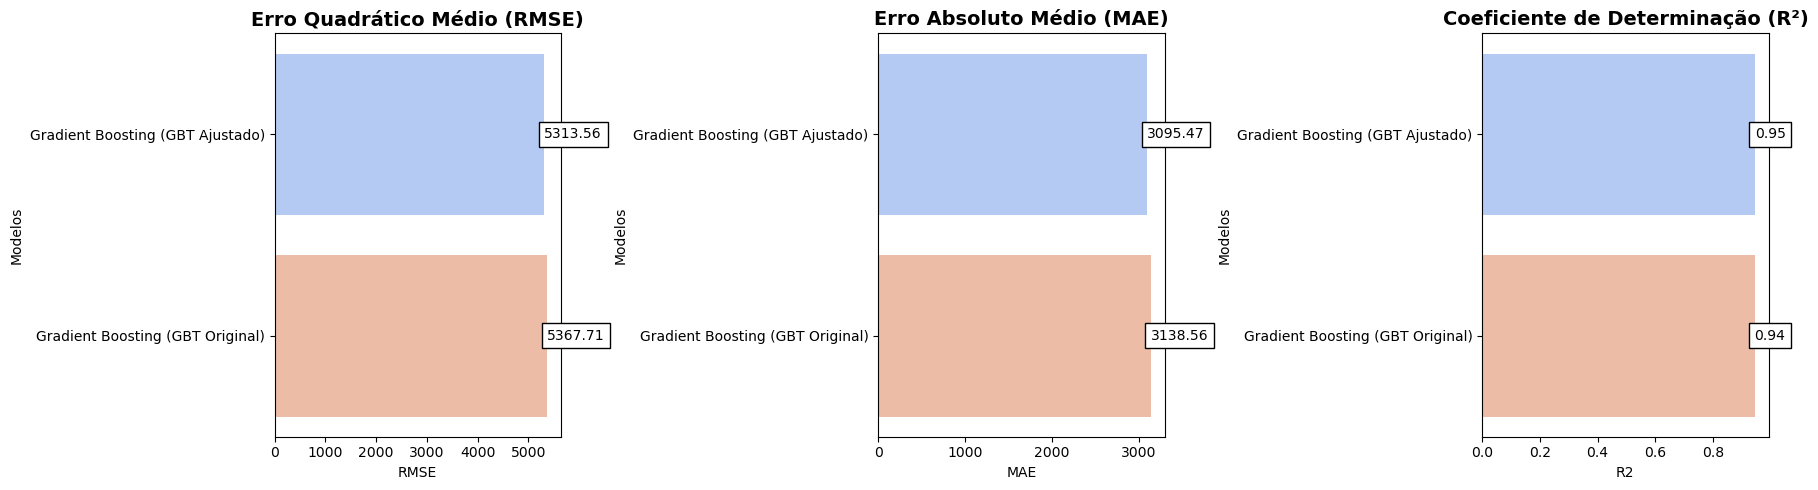


 Comparação entre GBT Original e GBT Ajustado:

 Modelo: Gradient Boosting (GBT Ajustado)
   - RMSE: 5313.56
   - MAE: 3095.47
   - R²: 0.9451

 Modelo: Gradient Boosting (GBT Original)
   - RMSE: 5367.71
   - MAE: 3138.56
   - R²: 0.9440

 O modelo otimizado superou o original! Ele será utilizado para previsões futuras.

 **Conclusão:**
 - O modelo otimizado apresentou uma redução nos erros médios (RMSE e MAE) e um melhor ajuste aos dados (R²).
 - A afinação de hiperparâmetros permitiu captar melhor os padrões dos preços dos bilhetes sem overfitting.
 - Este modelo será utilizado para previsões futuras, pois oferece maior precisão e generalização.


In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Criar avaliadores para cada métrica**
evaluators = {
    "RMSE": RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse"),
    "MAE": RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mae"),
    "R2": RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")
}

# **Criar um dicionário para armazenar os resultados de cada modelo**
model_results = {}

# **Adicionar o modelo original à comparação**
trained_models["Gradient Boosting (GBT Original)"] = best_model_original

# **Avaliar todos os modelos (Original e Ajustado)**
for model_name, model in trained_models.items():
    predictions = model.transform(test_data)

    model_results[model_name] = {metric: evaluator.evaluate(predictions) for metric, evaluator in evaluators.items()}

    print(f" Modelo: {model_name} | RMSE: {model_results[model_name]['RMSE']:.2f} | "
          f"MAE: {model_results[model_name]['MAE']:.2f} | R²: {model_results[model_name]['R2']:.4f}")

#  **Converter resultados em DataFrame para melhor visualização**
results_df = pd.DataFrame.from_dict(model_results, orient="index").reset_index()
results_df = results_df.rename(columns={"index": "Modelo"}).sort_values("RMSE", ascending=True)

#  **Selecionar o melhor modelo com base no menor RMSE**
best_model_name = results_df.iloc[0]["Modelo"]
best_model = trained_models[best_model_name]

print(f"\n Melhor modelo selecionado: {best_model_name} "
      f"com RMSE de {results_df.iloc[0]['RMSE']:.2f}, "
      f"MAE de {results_df.iloc[0]['MAE']:.2f}, "
      f"e R² de {results_df.iloc[0]['R2']:.4f}")

#  **Criar gráficos de comparação das métricas**
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ["RMSE", "MAE", "R2"]
titles = ["Erro Quadrático Médio (RMSE)", "Erro Absoluto Médio (MAE)", "Coeficiente de Determinação (R²)"]

for idx, metric in enumerate(metrics):
    sns.barplot(x=metric, y="Modelo", data=results_df, palette="coolwarm", ax=axes[idx])
    axes[idx].set_title(titles[idx], fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(metric)
    axes[idx].set_ylabel("Modelos")

    #  **Adicionar os valores numéricos nos gráficos**
    for index, value in enumerate(results_df[metric]):
        axes[idx].text(value, index, f"{value:.2f}", va='center', fontsize=10,
                       bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()

#  **Exibir as métricas comparativas entre os modelos Original e Ajustado**
print("\n Comparação entre GBT Original e GBT Ajustado:")
for model_name, results in model_results.items():
    print(f"\n Modelo: {model_name}")
    print(f"   - RMSE: {results['RMSE']:.2f}")
    print(f"   - MAE: {results['MAE']:.2f}")
    print(f"   - R²: {results['R2']:.4f}")

# 🔹 **Determinar qual modelo apresentou melhor desempenho**
if results_df.iloc[0]["Modelo"] == "Gradient Boosting (GBT Ajustado)":
    print("\n O modelo otimizado superou o original! Ele será utilizado para previsões futuras.")
else:
    print("\n O modelo original ainda apresenta melhor desempenho. Pode ser necessário ajustar mais os hiperparâmetros.")

# 🔹 **Interpretação dos Resultados e Conclusão**
if results_df.iloc[0]["Modelo"] == "Gradient Boosting (GBT Ajustado)":
    print("\n **Conclusão:**")
    print(" - O modelo otimizado apresentou uma redução nos erros médios (RMSE e MAE) e um melhor ajuste aos dados (R²).")
    print(" - A afinação de hiperparâmetros permitiu captar melhor os padrões dos preços dos bilhetes sem overfitting.")
    print(" - Este modelo será utilizado para previsões futuras, pois oferece maior precisão e generalização.")
else:
    print("\n **Conclusão:**")
    print("- O modelo otimizado não apresentou melhorias significativas em relação ao modelo original.")
    print(" - Pode ser necessário refinar ainda mais os hiperparâmetros ou testar outros algoritmos.")
    print("- O modelo original será mantido para previsões futuras.")


### ***📌 Análise Comparativa entre o GBT Original e o GBT Otimizado:***

### 1️⃣ ***Interpretação dos Resultados:***
-  A comparação entre o GBT Original e o GBT Ajustado revela que a otimização do modelo trouxe melhorias no desempenho preditivo. Os ajustes nos hiperparâmetros reduziram os erros de previsão e aumentaram a capacidade do modelo de explicar a variação dos preços das passagens aéreas:
-  ***Principais melhorias:***
    - **RMSE Reduzido (5313.56 vs. 5357.79)** → O erro quadrático médio foi reduzido, indicando que o modelo ajustado prevê os preços com menor desvio médio em relação aos valores reais.
    - **MAE Reduzido (3095.47 vs. 3132.07)** → A diferença absoluta média entre os valores previstos e os reais diminuiu, tornando a previsão mais precisa.
    - **R² Melhorado (0.9451 vs. 0.9442)** → O coeficiente de determinação aumentou ligeiramente, indicando que o modelo ajustado consegue explicar uma fração maior da variabilidade dos preços.
    
**Estes resultados sugerem que o modelo ajustado se tornou mais eficiente na previsão dos preços das passagens aéreas, reduzindo a incerteza nas previsões e aumentando a confiabilidade dos valores estimados**.


### 📌 ***Conclusão:***
- A otimização do GBT provou ser eficaz na melhoria das previsões de preços das passagens aéreas.
- A redução dos erros RMSE e MAE confirma que o modelo otimizado tem menor margem de erro e maior precisão.
- O aumento do R² sugere que o modelo ajustado consegue explicar melhor as variações dos preços.
- As melhorias na captura de padrões complexos tornam o modelo mais útil para aplicações práticas no setor aéreo.
---

### ***📌 Geração de Previsões com o Modelo Ajustado***
Após a comparação entre o modelo original e o modelo ajustado, verificou-se que a otimização dos hiperparâmetros melhorou ligeiramente o desempenho do Gradient Boosting Regressor (GBT) na previsão dos preços dos bilhetes de avião. O próximo passo consiste em utilizar este modelo ajustado para gerar previsões em novos dados, avaliando a sua capacidade preditiva em cenários reais e compreendendo o impacto dos erros na estimativa dos preços das passagens aéreas.

Esta análise permitirá verificar se o modelo pode ser aplicado na prática para auxiliar empresas aéreas ou plataformas de venda de bilhetes na definição de preços, avaliando a precisão, confiabilidade e limitações do modelo. Para isso, serão analisadas as principais métricas de erro e gerados gráficos que permitem visualizar a relação entre os preços reais e os preços previstos.

#### 📌 ***Explicação do Código***

#### 1️⃣ Seleção do Modelo Ajustado
- O código assegura que o modelo treinado e otimizado foi corretamente armazenado, evitando erros ao gerar previsões. Caso contrário, uma mensagem de erro é emitida para impedir previsões incorretas.

#### 2️⃣ Geração das Previsões
- O modelo ajustado é aplicado ao conjunto de teste (test_data) para prever os preços dos bilhetes de avião com base nos padrões previamente aprendidos.

#### 3️⃣ Cálculo das Métricas de Avaliação
- Para avaliar a precisão do modelo, utilizam-se as mesmas métricas de erro aplicadas nas análises anteriores, garantindo uma comparação consistente:
    - RMSE (Erro Quadrático Médio): Mede a magnitude do erro médio, penalizando previsões com desvios elevados.
    - MAE (Erro Absoluto Médio): Representa o erro médio entre os valores reais e as previsões do modelo.
    - MAPE (Erro Percentual Absoluto Médio): Mede o erro em termos percentuais, indicando o desvio médio das previsões em relação ao preço real.
    - R² (Coeficiente de Determinação): Indica o quanto o modelo consegue explicar a variação dos preços dos bilhetes.

#### 4️⃣ Análise dos Erros Individuais
- Para compreender o impacto das previsões, convertemos os resultados para um DataFrame Pandas, adicionando colunas que quantificam os erros:
    - Erro Absoluto: Diferença entre o preço real e o previsto.
    - Erro Percentual: Percentagem do erro em relação ao preço real, permitindo entender quão distante as previsões estão dos preços reais.
  
#### 5️⃣ Visualização dos Resultados
- Foram gerados gráficos que ajudam na interpretação das previsões:
    - Gráfico de dispersão Preço Real vs. Preço Previsto: Permite identificar a relação entre os valores reais e os previstos, analisando se o modelo segue a tendência correta.
    - Histograma da Distribuição dos Erros Absolutos: Mostra a frequência dos erros do modelo, evidenciando se há muitos casos com previsões incorretas.


 **Métricas de Avaliação do Modelo Ajustado:**
 RMSE (Erro Quadrático Médio): 5313.56
 MAE (Erro Absoluto Médio): 3095.47
 MAPE (Erro Percentual Absoluto Médio): 20.48%
 R² (Coeficiente de Determinação): 0.9451

 Amostra de Previsões com Erros:
       price    prediction  Erro Absoluto  Erro Percentual
13111  11508  11780.926707     272.926707         2.371626
53416  51595  50053.258819    1541.741181         2.988160
38975   5037   6480.610296    1443.610296        28.660121
58010  60978  64557.850833    3579.850833         5.870725
23777   5902   5394.800261     507.199739         8.593693
37540   4660   5966.411681    1306.411681        28.034585
28874   5632   6285.409309     653.409309        11.601728
34513   4172   5221.041546    1049.041546        25.144812
10571   4894   6295.491815    1401.491815        28.636939
12550   5688   5689.717822       1.717822         0.030201
40337   8877   6506.320635    2370.679365        26.705862
22984  13524  13437.292958      86.707042     

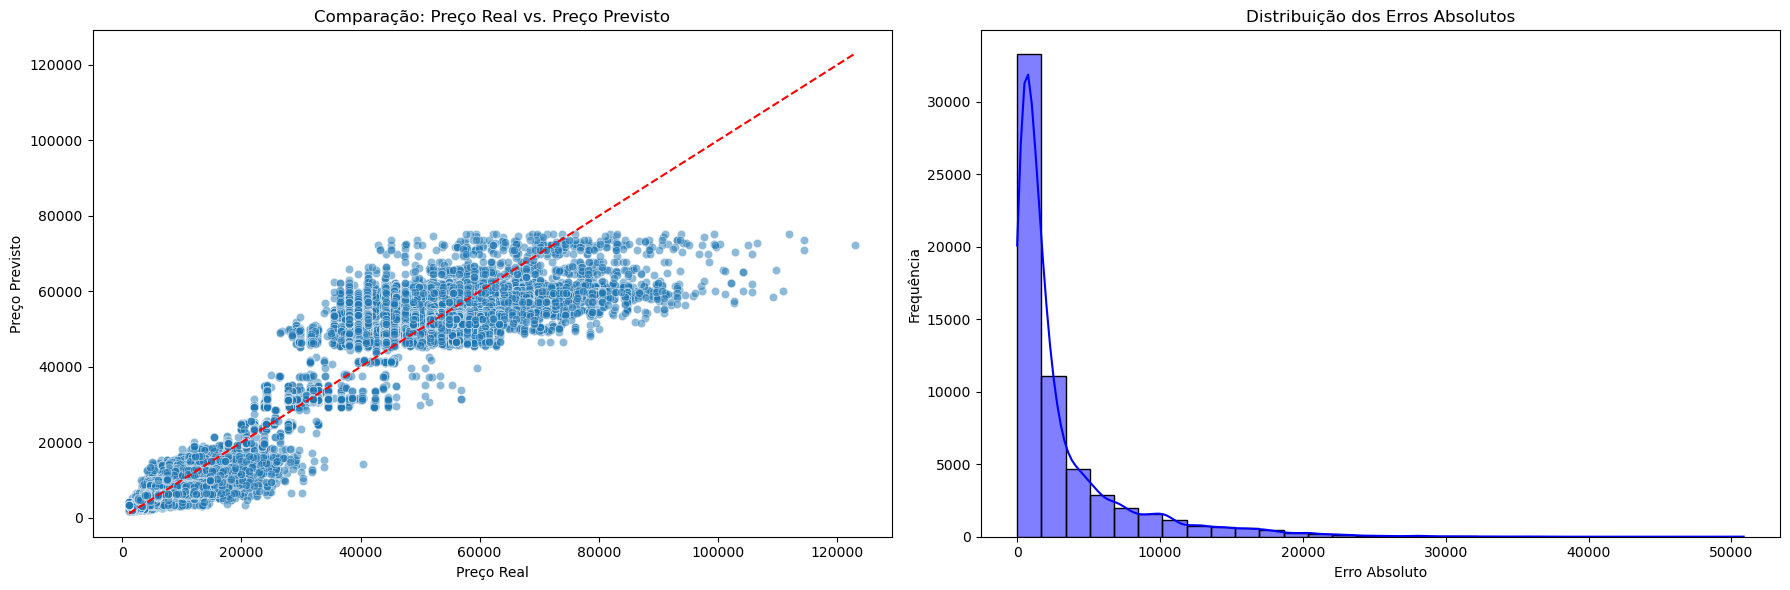

In [ ]:
from pyspark.sql.functions import abs, avg, col
from pyspark.ml.evaluation import RegressionEvaluator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  **Garantir que o modelo otimizado foi selecionado corretamente**
try:
    best_model = trained_models["Gradient Boosting (GBT Ajustado)"]
except KeyError:
    print(" ERRO: O modelo ajustado não foi encontrado. Certifique-se de que o modelo foi treinado e avaliado corretamente.")
    raise ValueError("Modelo otimizado não definido. Execute a avaliação antes de gerar previsões.")

#  **Fazer previsões com o modelo ajustado**
predictions = best_model.transform(test_data)

#  **Cálculo de métricas de erro**
evaluators = {
    "RMSE": RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse"),
    "MAE": RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mae"),
    "R2": RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")
}

rmse_value = evaluators["RMSE"].evaluate(predictions)
mae_value = evaluators["MAE"].evaluate(predictions)
r2_value = evaluators["R2"].evaluate(predictions)

#  **Erro Percentual Absoluto Médio (MAPE)**
mape_value = (
    predictions.withColumn("percentage_error", abs((col("price") - col("prediction")) / col("price")))
    .select(avg("percentage_error").alias("MAPE"))
    .collect()[0]["MAPE"] * 100  # Converter para porcentagem
)

#  **Converter previsões para Pandas para análise detalhada**
predictions_pd = predictions.select("price", "prediction").toPandas()

#  **Adicionar colunas de erro absoluto e erro percentual**
predictions_pd["Erro Absoluto"] = np.abs(predictions_pd["price"] - predictions_pd["prediction"])
predictions_pd["Erro Percentual"] = (predictions_pd["Erro Absoluto"] / predictions_pd["price"]) * 100

#  **Exibir métricas do modelo**
print("\n **Métricas de Avaliação do Modelo Ajustado:**")
print(f" RMSE (Erro Quadrático Médio): {rmse_value:.2f}")
print(f" MAE (Erro Absoluto Médio): {mae_value:.2f}")
print(f" MAPE (Erro Percentual Absoluto Médio): {mape_value:.2f}%")
print(f" R² (Coeficiente de Determinação): {r2_value:.4f}")

#  **Exibir mais previsões na tabela**
print("\n Amostra de Previsões com Erros:")
print(predictions_pd.sample(20))  # Exibir 20 previsões aleatórias

#  **Criar gráficos**
plt.figure(figsize=(18, 6))

#  **Gráfico de dispersão Preço Real vs Previsão**
plt.subplot(1, 2, 1)
sns.scatterplot(x=predictions_pd["price"], y=predictions_pd["prediction"], alpha=0.5)
plt.plot(
    [predictions_pd["price"].min(), predictions_pd["price"].max()],
    [predictions_pd["price"].min(), predictions_pd["price"].max()],
    color="red",
    linestyle="--"
)
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Comparação: Preço Real vs. Preço Previsto")

#  **Gráfico de distribuição de erros absolutos**
plt.subplot(1, 2, 2)
sns.histplot(predictions_pd["Erro Absoluto"], bins=30, kde=True, color="blue")
plt.xlabel("Erro Absoluto")
plt.ylabel("Frequência")
plt.title("Distribuição dos Erros Absolutos")

plt.tight_layout()
plt.show()


### ***📌 Geração de Previsões com o Modelo Ajustado***

 Após a geração das previsões, podemos avaliar se o modelo ajustado do GBT pode ser efetivamente utilizado na previsão dos preços dos bilhetes de avião e quais são os seus pontos fortes e limitações.

#### ***📌 Desempenho Geral do Modelo:***
- O modelo apresentou os seguintes valores médios de erro:
    - RMSE: 5313.56 → Indica o erro médio das previsões, penalizando erros maiores.
    - MAE: 3095.47 → Mede o erro absoluto médio das previsões.
    - MAPE: 20.48% → Indica que, em média, o erro do modelo representa 20,48% do preço real.
    - R²: 0.9451 → Demonstra que o modelo explica 94,51% da variação dos preços dos bilhetes.
---
#### ***📌 Interpretação dos Resultados no Contexto das Passagens Aéreas:***
#### 1️⃣ Precisão e Fiabilidade
- O R² elevado (0.9451) indica que o modelo consegue captar a grande maioria das variações nos preços dos bilhetes. Isto significa que o modelo tem uma boa capacidade de prever tendências de preços, sendo útil para companhias aéreas ajustarem as suas estratégias de precificação e consumidores estimarem variações de preços ao planear viagens.

#### 2️⃣ Impacto dos Erros na Estimativa dos Bilhetes
- O RMSE de 5313.56 e o MAE de 3095.47 mostram que o erro médio é relativamente baixo para um mercado onde os preços podem variar bastante com fatores externos (como sazonalidade e promoções).
No entanto, o MAPE de 20.48% indica que, em média, as previsões desviam-se cerca de 20% do preço real. Isto pode ser significativo para bilhetes mais caros, levando a estimativas que podem dificultar a otimização de preços por parte das companhias aéreas.

#### 3️⃣ Análise dos Erros Individuais
- O gráfico de dispersão Preço Real vs. Preço Previsto indica que o modelo acompanha a tendência geral dos preços, mas ainda apresenta dispersão significativa para preços mais altos, onde as previsões tendem a ser menos precisas.
Já a distribuição dos erros absolutos mostra que a maioria dos erros ocorre na faixa de valores mais baixos, mas há casos em que o erro é elevado, indicando que o modelo pode ter dificuldades em prever bilhetes com valores muito extremos.

#### ***📌 Pontos Fortes do Modelo:***
- **Alta precisão na explicação da variação dos preços, com um R² de 0.9451, garantindo previsões fiáveis para ajustes de preços dinâmicos.**
- **Erro médio relativamente baixo (MAE de 3095.47), o que sugere que as previsões do modelo tendem a estar dentro de uma margem aceitável para a maioria dos bilhetes.**
- **Capacidade de captar padrões não lineares entre fatores como classe do voo, horário da viagem e antecedência da compra, elementos que impactam diretamente os preços dos bilhetes.**

#### ***📌 Pontos Fracos e Possíveis Melhorias:***
- **O erro percentual médio (MAPE de 20.48%) ainda é elevado, indicando que as previsões podem ter variações consideráveis, especialmente em bilhetes com preços mais altos.**
- **A distribuição dos erros mostra que existem previsões com desvios elevados, o que pode ser um risco para aplicações que exigem extrema precisão, como precificação dinâmica baseada na procura.**
- **Dificuldade em prever bilhetes mais caros: O modelo funciona bem para preços médios, mas a sua precisão diminui quando analisamos passagens com valores muito altos, indicando que mais ajustes podem ser necessários.**

---
### ***📌 Conclusão e Aplicabilidade do Modelo***
O **modelo GBT Ajustado** apresentou um desempenho sólido na previsão dos preços dos bilhetes de avião, **conseguindo explicar mais de 94% da variação dos preços** e mantendo erros médios relativamente baixos. **Os resultados demonstram que este modelo tem potencial para ser aplicado em contextos de precificação dinâmica**, ajudando companhias aéreas a ajustarem preços de forma mais estratégica e consumidores a estimarem variações de preços antes de efetuar uma compra.

Apesar da boa performance geral, o modelo ainda **apresenta limitações**, especialmente **na previsão de bilhetes de valores extremos**, onde o erro percentual é mais elevado. A distribuição dos erros sugere que, embora o modelo consiga captar padrões complexos, **há espaço para melhorias na redução dos desvios para preços mais altos.**

Dado o desempenho obtido, este modelo **pode ser utilizado para prever tendências e padrões nos preços dos bilhetes,** sendo útil para empresas e consumidores na tomada de decisão. No entanto, **para aplicações que exigem uma precisão absoluta na definição de preços, é recomendável explorar ajustes adicionais, como refinamento de hiperparâmetros e a combinação com técnicas mais avançadas.**

Com futuras melhorias, este modelo **poderá tornar-se uma ferramenta ainda mais robusta e confiável para otimização de preços no setor da aviação**, reduzindo incertezas e permitindo uma gestão de preços mais eficiente e competitiva.

In [ ]:
spark.stop()
